<a href="https://colab.research.google.com/github/jouherdauf/Customer-Segmentation/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Title : Classification : Mobile Price Range Prediction**

##### **Project Type**    - Machine Learning/UnSupervised/Clustering
##### **Contribution**    - Individual
##### **Name-** Jouher Lais Khan

### **Github Link -** https://github.com/jouherdauf/Customer-Segmentation

## <b> Introduction </b>

### In a world where companies are expanding rapidly and regularly serving a big consumer base. Businesses must now classify their clientele in order to provide better customer service and to better understand the various ways that varied clientele might affect their operations. The purpose of this project is to categorize customers and determine how they affect the company.

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invoice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

### This project has been completed in 5 steps :-

### 1. Data Cleaning
### 2. Exploratory Data Analysis (EDA)
### 3. Data Transformation
### 4. Clustering
### 5. Cluster Profiling
### 6. Model Performance

### Importing the data

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Mounting the drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the data
data = pd.read_excel('/content/drive/MyDrive/Online Retail.xlsx')

In [ ]:
# First 5 rows of the data
data.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
#Last five rows of the data
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [ ]:
# Information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
# Statistical description of the data
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Since,quantity and unit price cannot be negative we have to remove row that are negative.

##1. **Data Cleaning**

### In this step, the main focus will handle the null values and other errors in the data. Columns that are not required will also be dropped.

In [ ]:
# Total null values in each of the columns
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

## Null values of the Description column

In [ ]:
# Number of unique products in the dataset
data['Description'].nunique()

4223

### There are 1454 null values in the description column. We cannot fill null values of desciption column, so we will drop it

In [ ]:
# Dropping the null values of the description column
data.dropna(subset = ['Description'], inplace = True)

## Null values of the Customer ID column

### As customer ID is a 5 digit number, we can convert it from a float type to an integer type.

In [ ]:
# Sum of null values in the dataset
data.isna().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133626
Country             0
dtype: int64

In [ ]:
# Number of unique Customer IDs
data['CustomerID'].nunique()

4372

### There are 4372 unique customers in the dataset, there are also 133626 null values in the column. There is no particular method to fill these huge number of points. We cannot use median, mean or mode to fill these values. It is close to impossible that one customer ID can fill 133626 rows. Hence, we will drop the rows containing null values.

In [ ]:
# Dropping the rows which contain null values in the Customer ID column
data.dropna(subset=['CustomerID'], axis = 0, inplace = True)

In [ ]:
# Re-checking null values after removal
print(data.isna().sum())
print(f'The shape of the data is {data.shape}')

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64
The shape of the data is (406829, 8)


In [ ]:
# Converting Customer ID column from float type to int type
data['CustomerID'] = data['CustomerID'].apply(int)

### The null values have been succesfully removed, unfortunately more than 100000 rows have been lost in the process.

### The invoice number that end C is cancelled so we will remove these row and the product that are being cancelled bought on the first hand,so first we will find the invoice number of the product being bought.

In [ ]:
# Converting the column to a string type to detect 'C'
data['InvoiceNo'] = data['InvoiceNo'].apply(str)

In [ ]:
# Applying the above function and creating a new column to display cancelled orders
data = data[~data['InvoiceNo'].str.startswith('C')]

In [ ]:
# Converting the Invoice no column back to a numerical type
data['InvoiceNo'] = data['InvoiceNo'].apply(int)

### Stock code and Item description represent the same thing, but item description describes it more clearly. Hence, we can drop the stock code.

In [ ]:
# Dropping Stock Code column
data.drop('StockCode', axis = 1, inplace = True)

Since,quantity and unitprice cannot be negative we will drop row where quantity or unit price  is  negative

In [ ]:
data = data[(data['Quantity'] >= 0) & (data['UnitPrice'] >= 0)]

In [ ]:
data.describe()

,InvoiceNo,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000,397924.000000
mean,560617.126645,13.021823,3.116174,15294.315171
std,13106.167695,180.420210,22.096788,1713.169877
min,536365.000000,1.000000,0.000000,12346.000000
25%,549234.000000,2.000000,1.250000,13969.000000
50%,561893.000000,6.000000,1.950000,15159.000000
75%,572090.000000,12.000000,3.750000,16795.000000
max,581587.000000,80995.000000,8142.750000,18287.000000


### Using the invoice date column, elements such as day month and year are extracted. This will help in the EDA process.

In [ ]:
# Using the Invoice date column to extract
data['Day'] = data['InvoiceDate'].dt.day
data['Month'] = data['InvoiceDate'].dt.month
data['Year'] = data['InvoiceDate'].dt.year

### The time and year part of the column is not used because, time of the day does not influence the orders to a large extent and our datset is of only one year.

### After extraction of the day, month and year. The invoice date column will be dropped.

In [ ]:
# Dropping the invoice date column
data.drop('InvoiceDate', axis = 1, inplace = True)

In [ ]:
# Brief Description of the data
data.describe()

,InvoiceNo,Quantity,UnitPrice,CustomerID,Day,Month,Year
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,560617.126645,13.021823,3.116174,15294.315171,15.042181,7.612537,2010.934259
std,13106.167695,180.420210,22.096788,1713.169877,8.653771,3.416527,0.247829
min,536365.000000,1.000000,0.000000,12346.000000,1.000000,1.000000,2010.000000
25%,549234.000000,2.000000,1.250000,13969.000000,7.000000,5.000000,2011.000000
50%,561893.000000,6.000000,1.950000,15159.000000,15.000000,8.000000,2011.000000
75%,572090.000000,12.000000,3.750000,16795.000000,22.000000,11.000000,2011.000000
max,581587.000000,80995.000000,8142.750000,18287.000000,31.000000,12.000000,2011.000000


### In the data cleaning procedure :-

*   Null Values were removed
*   Cancelled orders were removed
*   Invoice Date column was split to form seperate date, month and year columns
*   Outliers were removed
*   Columns such as invoice date, stock code have been removed



## 2. **Exploratory Data Analysis (EDA)**

### In this section, different columns will be explored individually and also as a combination of different columns.

### Univariate Analysis

### Distribution of Quantity

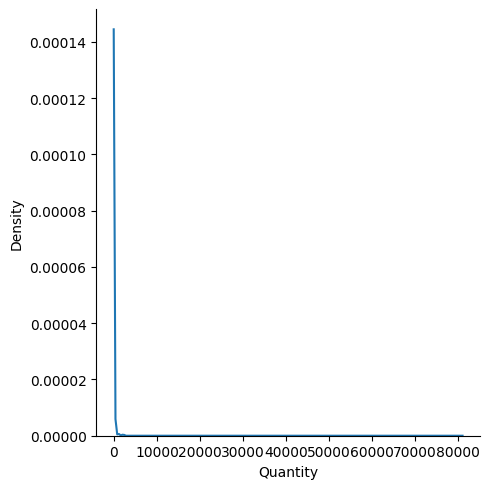

In [ ]:
# Distribution of the quantity column
sns.displot(data=data, x="Quantity", kind="kde")
plt.show()

### From the histogram we can see that  Quantity Column cantain high number of outliers.Most of the distribution is between 0 to 100.So, we will plot the the sitribution plot  of quantity between 1 to 200



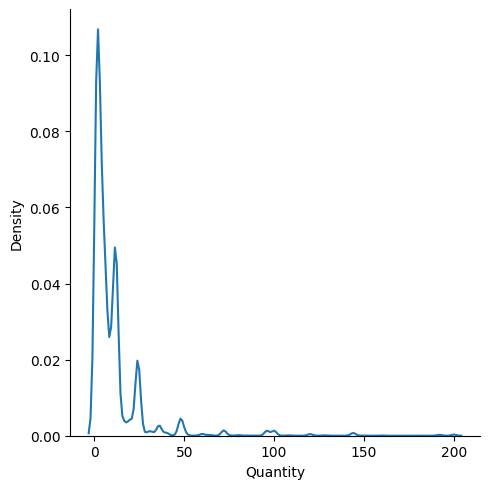

In [ ]:
data_quantity = data[data['Quantity'] <= 200]
sns.displot(data=data_quantity, x="Quantity", kind="kde")
plt.show()

We can see most of the quantity lies between 0 to 50

### Top 10 most repeatedly sold items

In [ ]:
# Top 10 most repeatedly sold items
data['Description'].value_counts()[:10]

WHITE HANGING HEART T-LIGHT HOLDER    2028
REGENCY CAKESTAND 3 TIER              1724
JUMBO BAG RED RETROSPOT               1618
ASSORTED COLOUR BIRD ORNAMENT         1408
PARTY BUNTING                         1397
LUNCH BAG RED RETROSPOT               1316
SET OF 3 CAKE TINS PANTRY DESIGN      1159
LUNCH BAG  BLACK SKULL.               1105
POSTAGE                               1099
PACK OF 72 RETROSPOT CAKE CASES       1068
Name: Description, dtype: int64

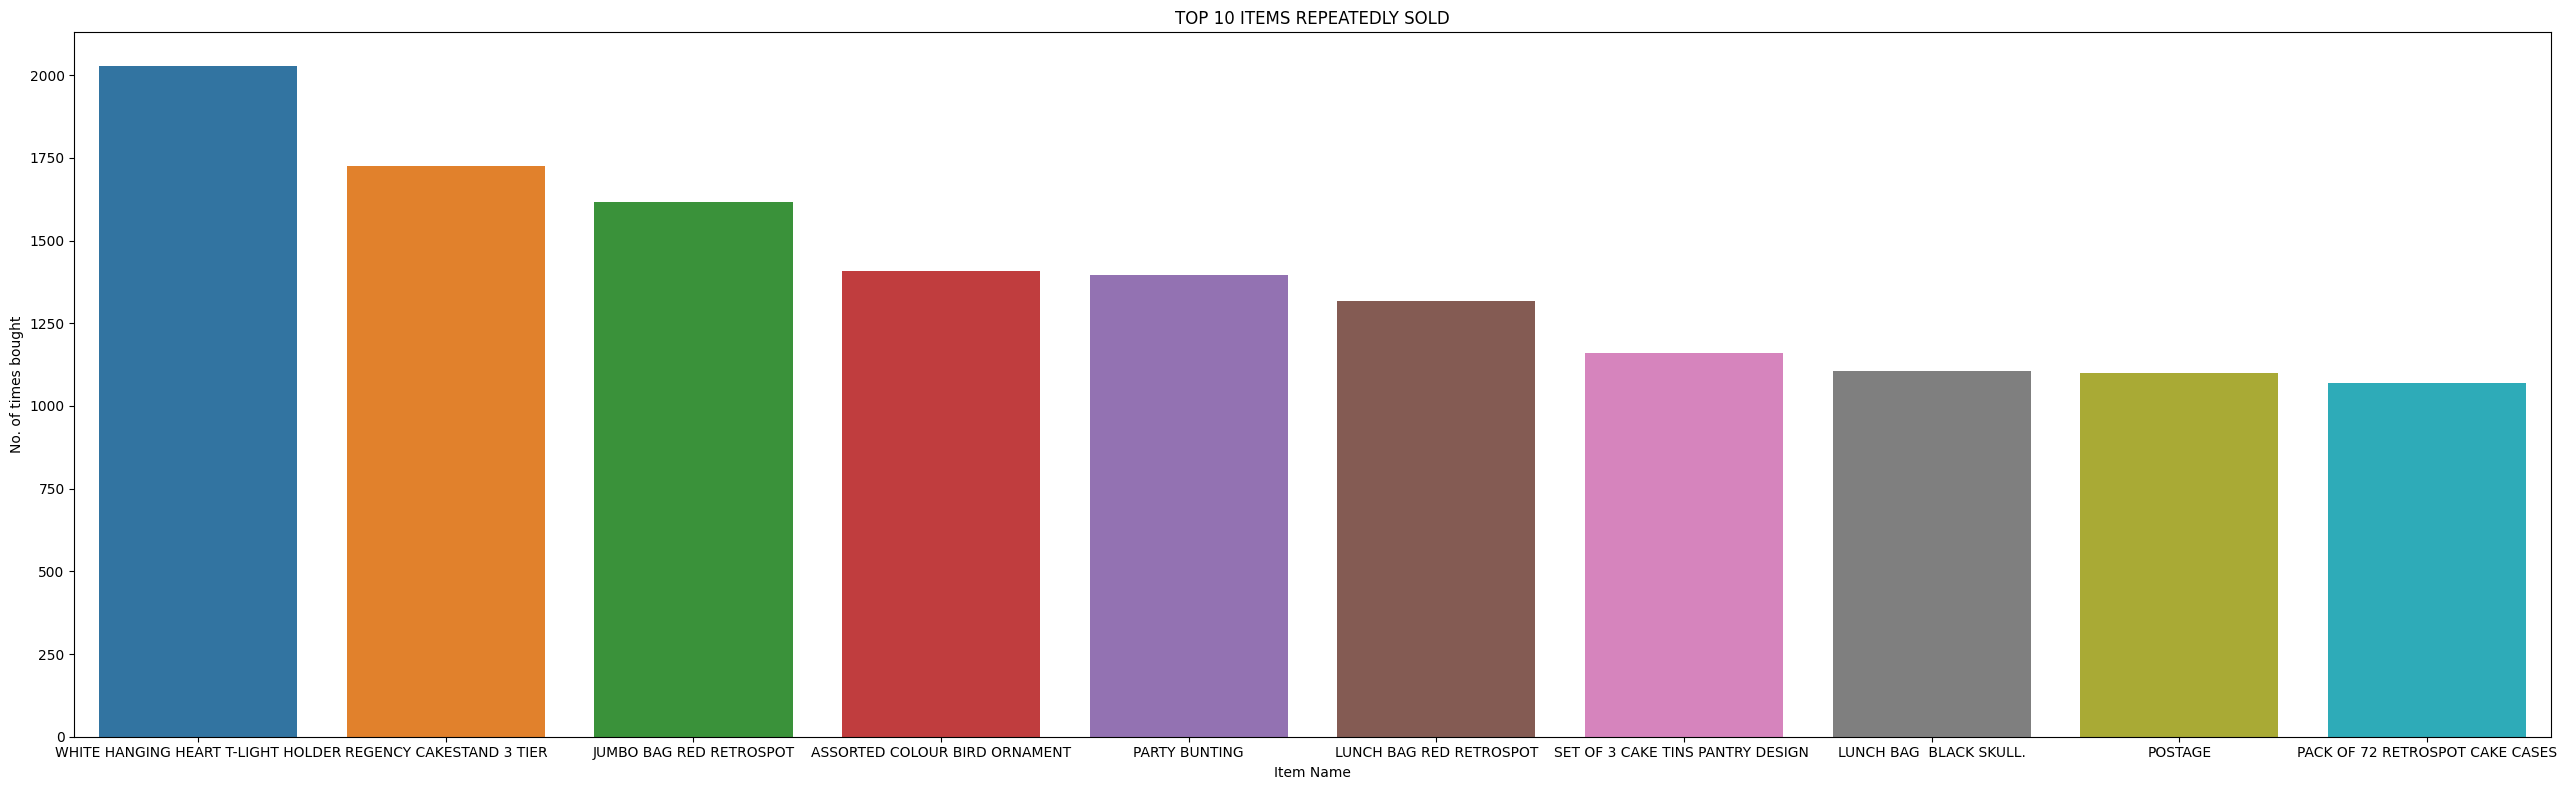

In [ ]:

# Barplot of the top 10 most repeatedly sold items
plt.figure(figsize = (26,8))
sns.barplot(x = data['Description'].value_counts()[:10].index, y = data['Description'].value_counts()[:10].values)
plt.xlabel('Item Name')
plt.ylabel('No. of times bought')
plt.title('TOP 10 ITEMS REPEATEDLY SOLD')
plt.tight_layout()

### Distribution of the Unit Price

<Figure size 1400x600 with 0 Axes>

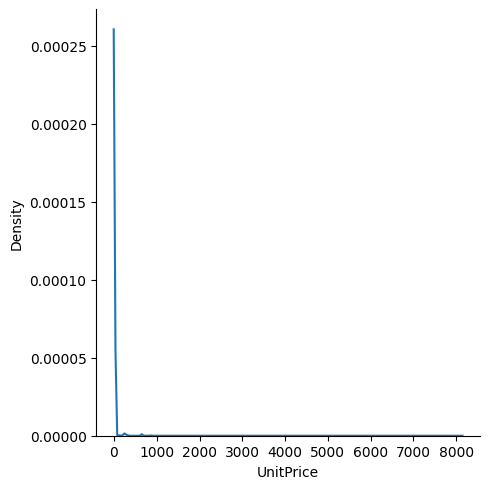

In [ ]:
# Distribution of unit price
plt.figure(figsize = (14,6))
sns.displot(data=data, x="UnitPrice", kind="kde")
plt.show()

### From the distribution of unit price, it is understood that most items have a lower price range. There are comparatively fewer products with higher unit prices than products with lower unit prices.We will check thd distribution of price between 1 to 100

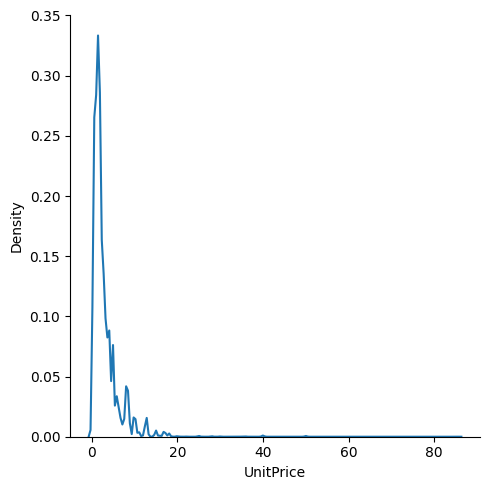

In [ ]:
data_unitprice = data[data['UnitPrice'] <= 100]
sns.displot(data=data_unitprice, x="UnitPrice", kind="kde")
plt.show()

###From the distribution we can see that UnitPrice distribution is between 1 to 20

### Customer who purchased most number of times

Text(0.5, 1.0, 'TOP 10 REPEATED CUSTOMER ID')

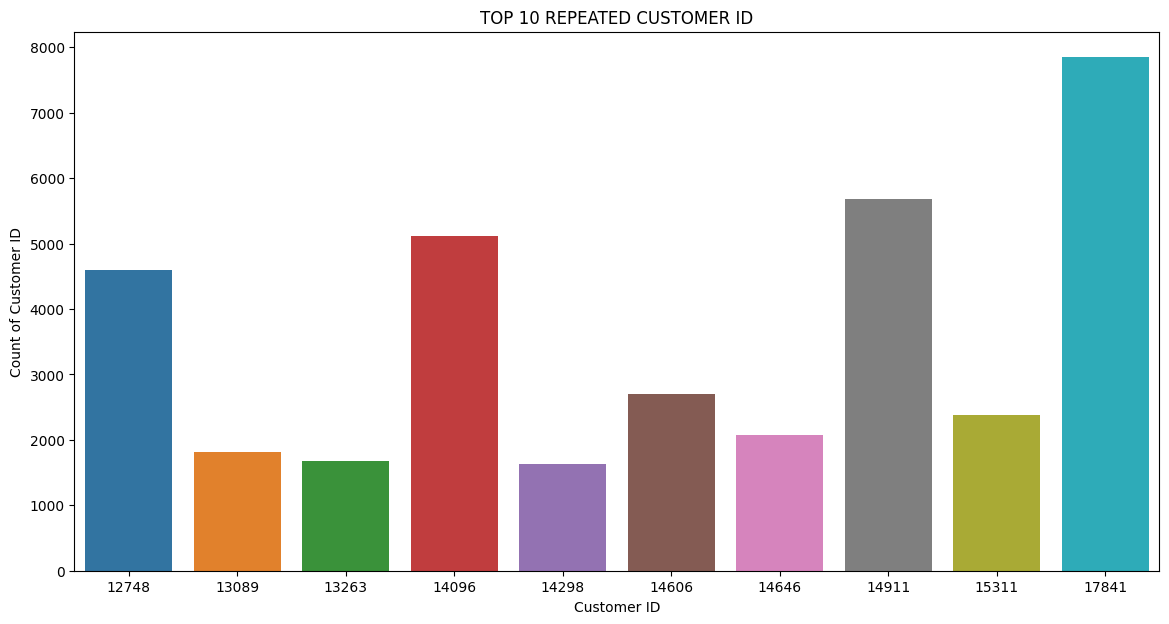

In [ ]:
# Top 10 repeated customer ID
plt.figure(figsize = (14,7))
sns.barplot(x = data['CustomerID'].value_counts()[:10].index , y = data['CustomerID'].value_counts()[:10].values)
plt.xlabel('Customer ID')
plt.ylabel('Count of Customer ID')
plt.title('TOP 10 REPEATED CUSTOMER ID')

### As seen from the barplot of the customer ID column, customer with the ID 17841 has highest number of counts, which indicates that they purchased many different items.

### Countries that were sold different items the most

Text(0.5, 1.0, 'TOP 10 COUNTRIES SOLD TO')

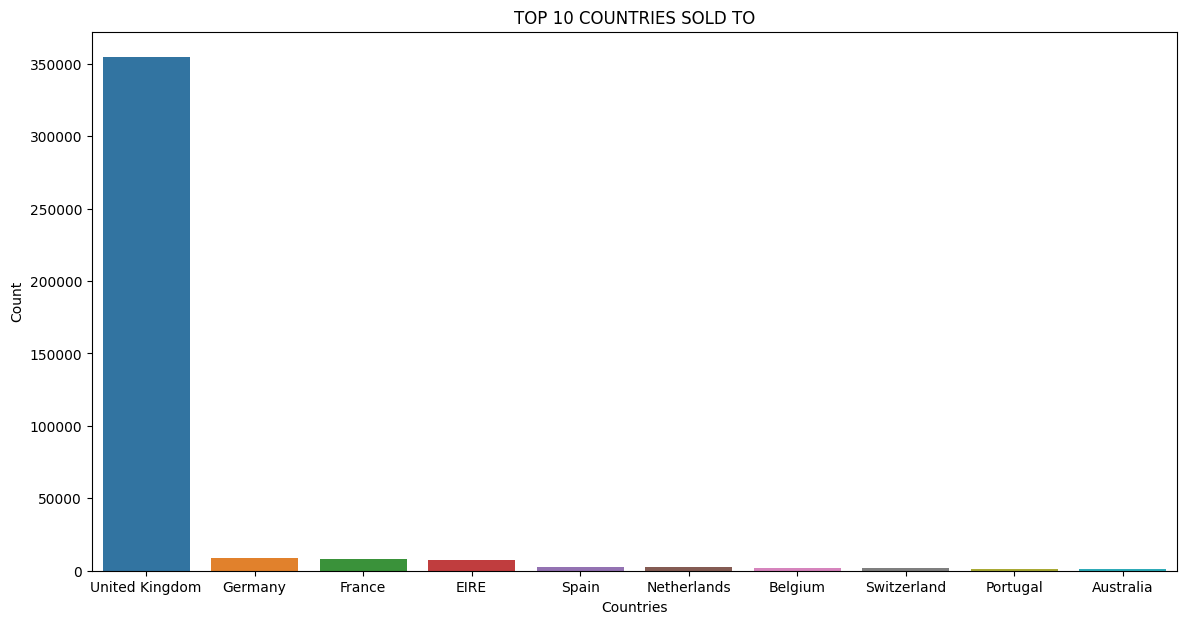

In [ ]:
# Top 10 countries that were sold different items
plt.figure(figsize = (14,7))
sns.barplot(x = data['Country'].value_counts()[:10].index, y = data['Country'].value_counts()[:10].values)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title('TOP 10 COUNTRIES SOLD TO')

### From the barplot for purchases by countries, it is clearly seen that United Kingdom dominates the purchases compared to other countries. All the top 10 countries are a part of Europe, itself.

### Monthly purchaces

Text(0.5, 1.0, 'MONTHLY PURCHASES')

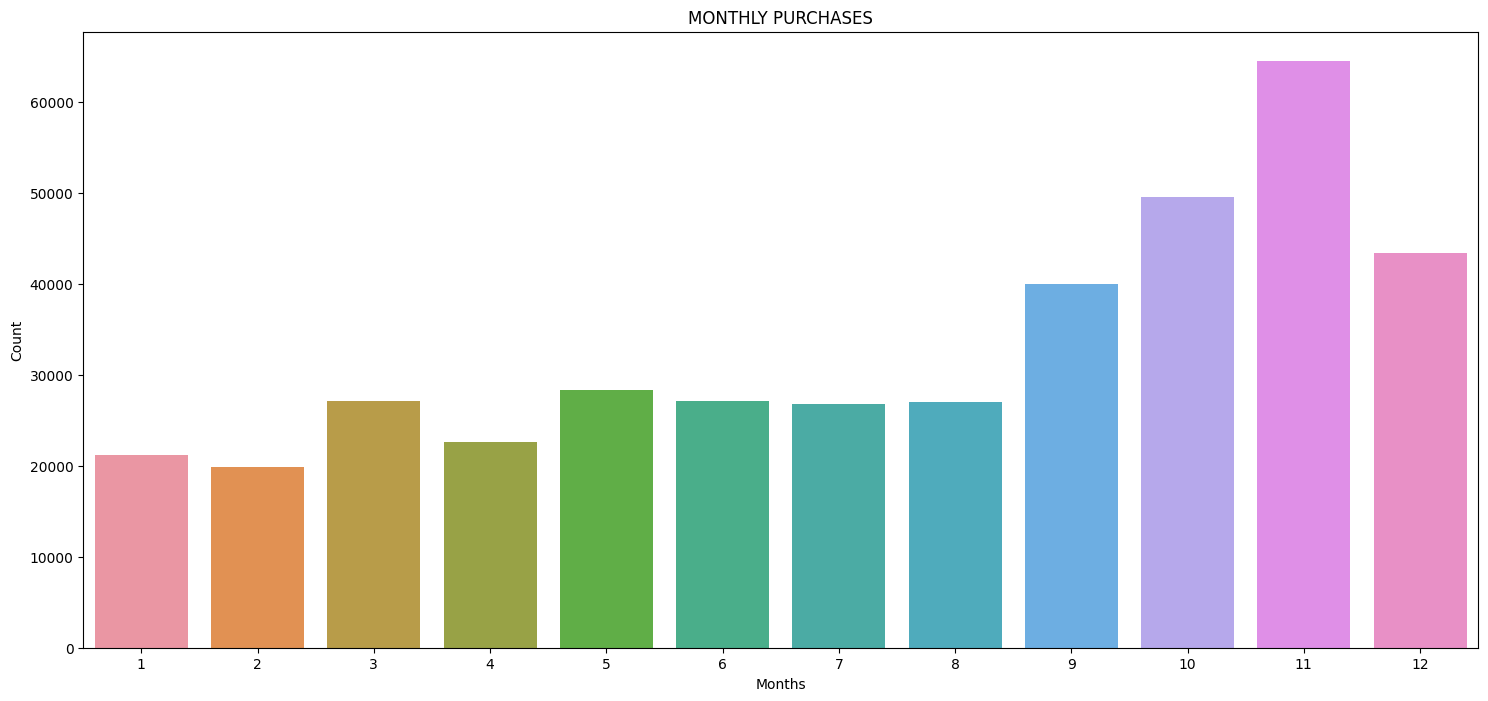

In [ ]:
# Monthly purchases
plt.figure(figsize = (18,8))
sns.barplot(x = data['Month'].value_counts().index, y = data['Month'].value_counts().values)
plt.xlabel('Months')
plt.ylabel('Count')
plt.title('MONTHLY PURCHASES')

### From the plot for monthly purchases it is seen that most of the purchases, occur in the month of November, followed by October and December.

### Bivariate Analysis

### Invoices with highest number of items

In [ ]:
# Invoices with most number of items
inv_quantity_10 = data.groupby('InvoiceNo').sum()['Quantity'].sort_values(ascending = False)[:10]

Text(0.5, 1.0, 'INVOICE NUMBER AND SUM OF QUANTITIES')

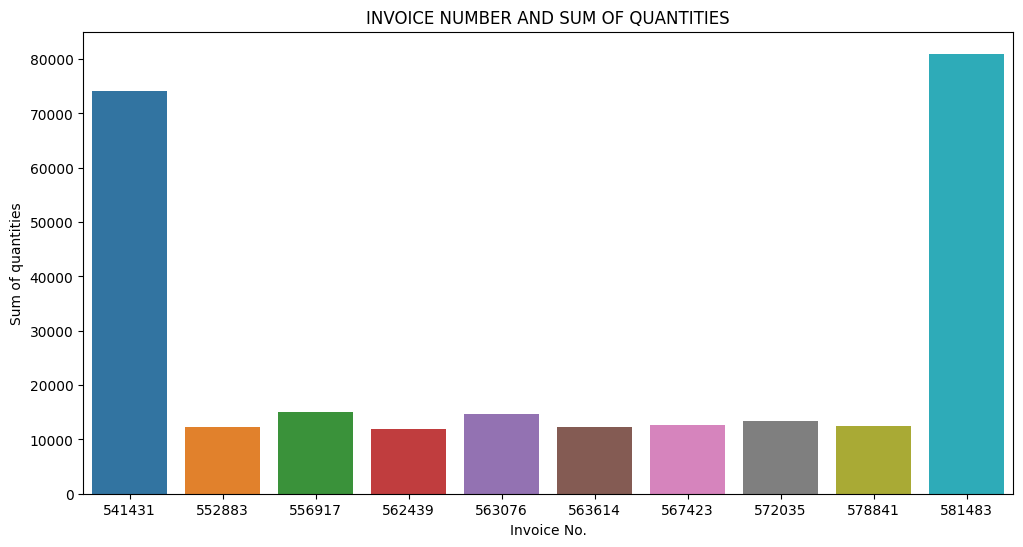

In [ ]:
# Barplot for invoices with most number of items
plt.figure(figsize = (12,6))
sns.barplot(x = inv_quantity_10.index, y = inv_quantity_10.values)
plt.xlabel('Invoice No.')
plt.ylabel('Sum of quantities')
plt.title('INVOICE NUMBER AND SUM OF QUANTITIES')

### Invoice No. 570672 has the most number of items in it.

### Customer ID in terms of quantities purchased

In [ ]:
# Top 10 Customer Id in terms of quantities purchased
customer_quantity_10 = data.groupby('CustomerID').sum()['Quantity'].sort_values(ascending = False)[:10]

Text(0.5, 1.0, 'CUSTOMER ID AND SUM OF QUANTITY')

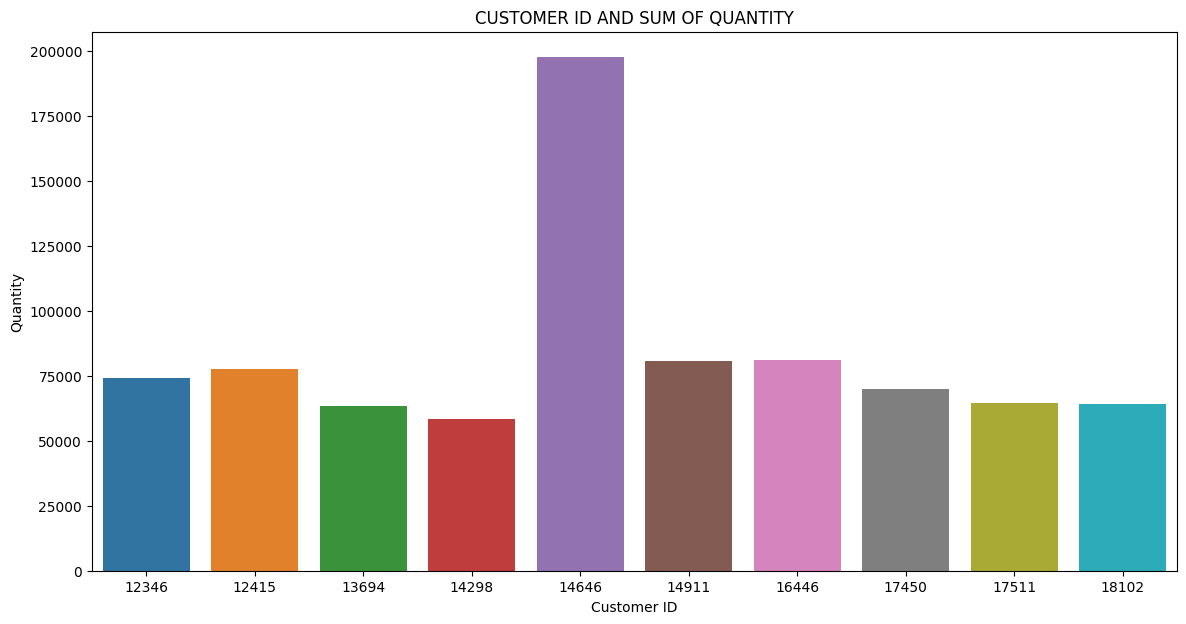

In [ ]:
# Barplot for top 10 customers who purchased in high quantity
plt.figure(figsize = (14,7))
sns.barplot(x = customer_quantity_10.index, y = customer_quantity_10.values)
plt.xlabel('Customer ID')
plt.ylabel('Quantity')
plt.title('CUSTOMER ID AND SUM OF QUANTITY')

### Customer with the ID 14911 purchases in large number significantly more than other customers. This customer could be vital to the business.

### Items sold in terms of quantites

In [ ]:
# Top 10 items sold in terms of quantity
item_quantity_10 = data.groupby('Description').sum()['Quantity'].sort_values(ascending = False)[:10]

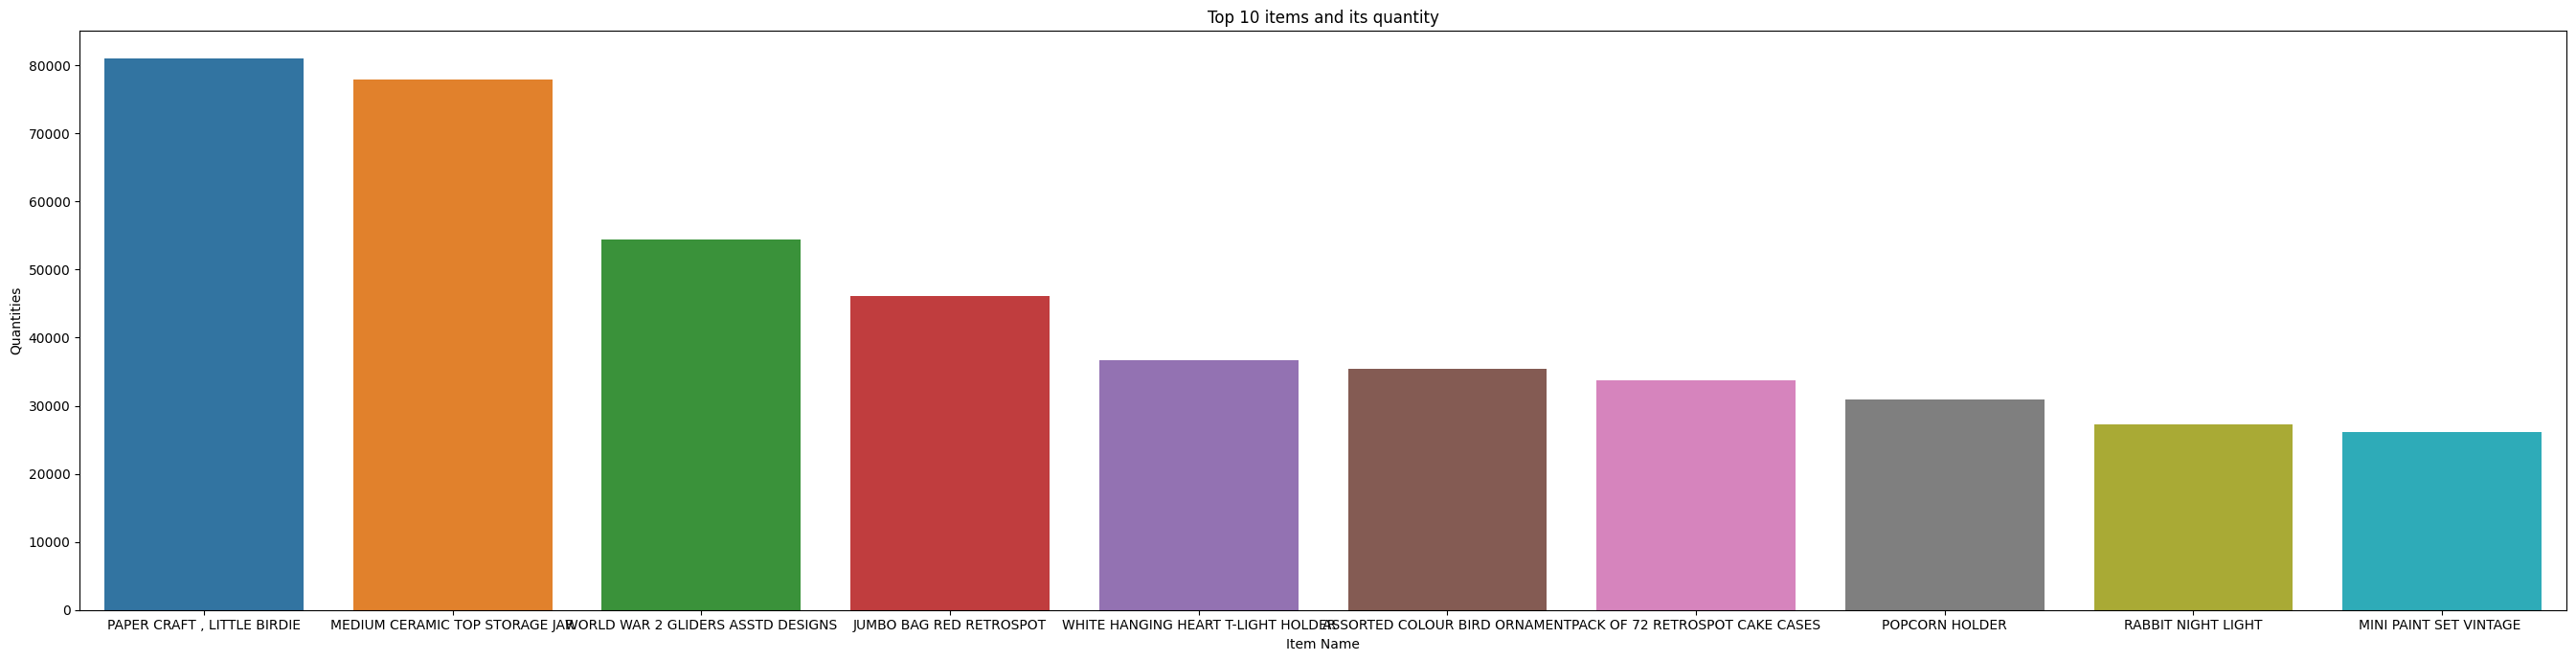

In [ ]:
# Barplot of top 10 items sold in terms of quantity
plt.figure(figsize = (27,7))
sns.barplot(x = item_quantity_10.index, y = item_quantity_10.values)
plt.xlabel('Item Name')
plt.ylabel('Quantities')
plt.title('Top 10 items and its quantity')
plt.tight_layout()

### 'Pack of 72 retrospot cake cases' were sold the most in terms of quantity, around 15000 units.

### Correlation between variables

Text(0.5, 1.0, 'CORRELTAION MATRIX')

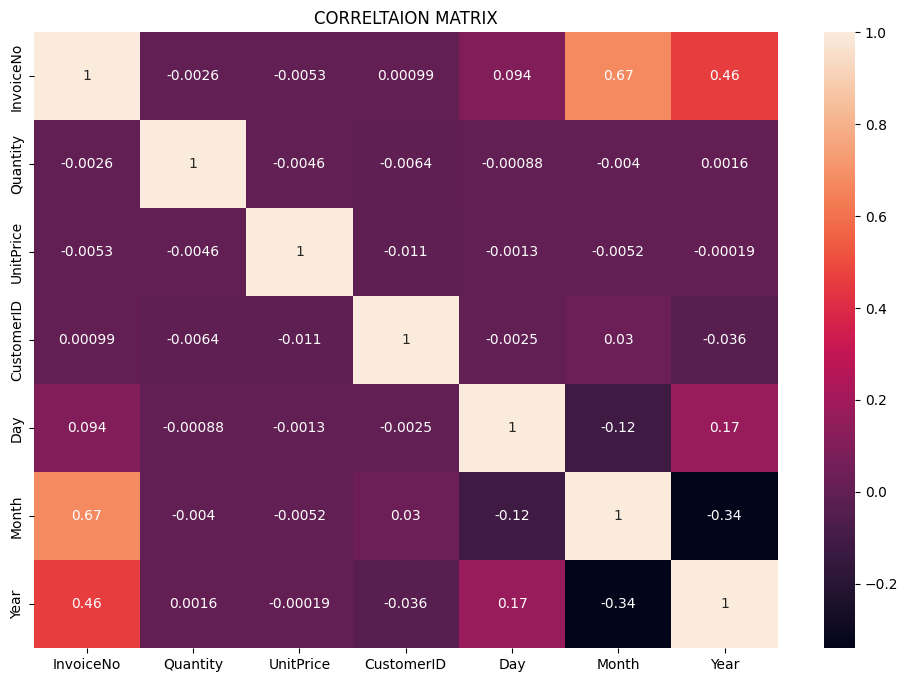

In [ ]:
# Correlation between various columns
plt.figure(figsize = (12,8))
sns.heatmap(data.corr(), annot = True)
plt.title('CORRELTAION MATRIX')

### From the correaltion matrix, it is understood that most columns are not correlated to each other. Except for month and year, they are highly correlated with the invoice number. Whereas month and year are negatively correlated.


### From the EDA section some assumptions can be made

*   Small to medium quantities of each item are purchased more.
*   Unit price for most products is low.
*   Last quarter of the year has more orders maybe due to the holiday season.
*   As customers buy in large quantites, it is a volume based business.



#Outliers Detection

In [ ]:
def outlier_boundaries(dataframe, column):
    q1 = dataframe[column].quantile(0.25)
    q3 = dataframe[column].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    return fence_high,fence_low
def get_outlier_count_and_percentage(dataframe, column):
  upper_outlier_bound, lower_outlier_bound = outlier_boundaries(dataframe, column)
  count = 0
  for value in dataframe[column]:
    if value >  upper_outlier_bound or value < lower_outlier_bound:
      count += 1
  percentage = round(count/dataframe.shape[0]*100, 2)
  return (count, percentage)

Outliers in Sales : 25656 (6.45%)


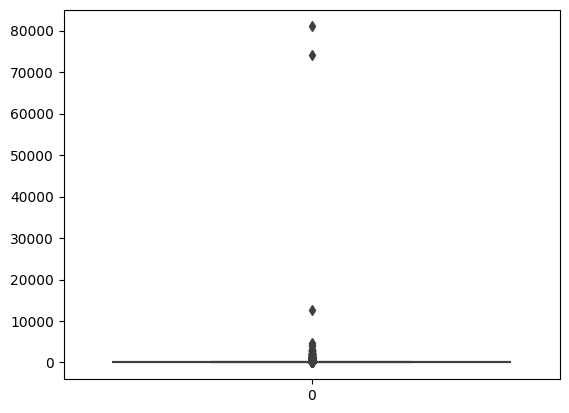

In [ ]:
sns.boxplot(data['Quantity'])
count, perc = get_outlier_count_and_percentage(data, 'Quantity')
print(f"Outliers in Sales : {count} ({perc}%)")

In [ ]:
# count and percentage of data of different values
for limit in (50,100,150):
  count = data[data['Quantity'] > limit].shape[0]
  perc = round(count/data.shape[0]*100, 2)
  print(f"Count & percentage of data above {limit} : {count} ({perc}%)")

Count & percentage of data above 50 : 11609 (2.92%)
Count & percentage of data above 100 : 4665 (1.17%)
Count & percentage of data above 150 : 2641 (0.66%)


In [ ]:
#removing Sales values greater than 50
data.drop(data[data['Quantity'] >= 50].index,inplace =True)

Outliers in Sales : 13152 (3.41%)


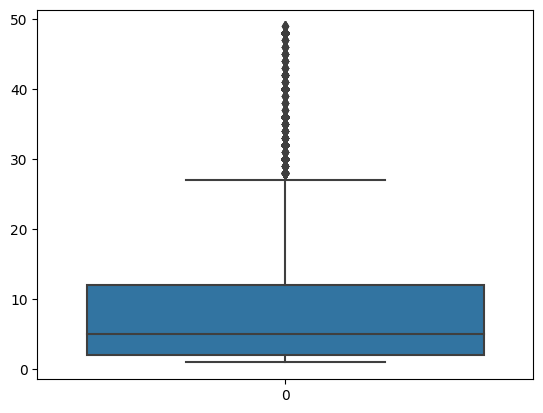

In [ ]:
sns.boxplot(data['Quantity'])
count, perc = get_outlier_count_and_percentage(data, 'Quantity')
print(f"Outliers in Sales : {count} ({perc}%)")

Outliers in Sales : 34269 (8.89%)


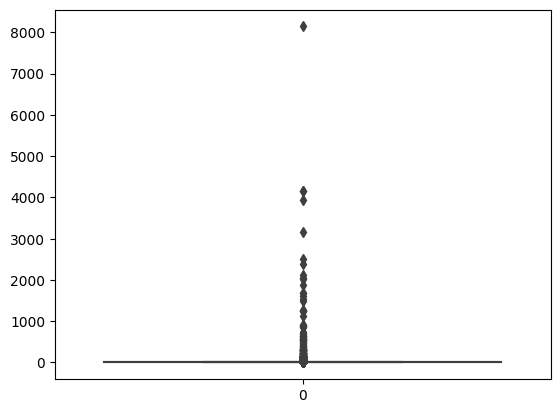

In [ ]:
sns.boxplot(data['UnitPrice'])
count, perc = get_outlier_count_and_percentage(data, 'UnitPrice')
print(f"Outliers in Sales : {count} ({perc}%)")

In [ ]:
# count and percentage of data of different values
for limit in (10,20,30):
  count = data[data['UnitPrice'] > limit].shape[0]
  perc = round(count/data.shape[0]*100, 2)
  print(f"Count & percentage of data above {limit} : {count} ({perc}%)")

Count & percentage of data above 10 : 10810 (2.8%)
Count & percentage of data above 20 : 1117 (0.29%)
Count & percentage of data above 30 : 747 (0.19%)


In [ ]:
#removing Sales values greater than 30
data.drop(data[data['UnitPrice'] >= 20].index,inplace =True)

Outliers in Sales : 33149 (8.63%)


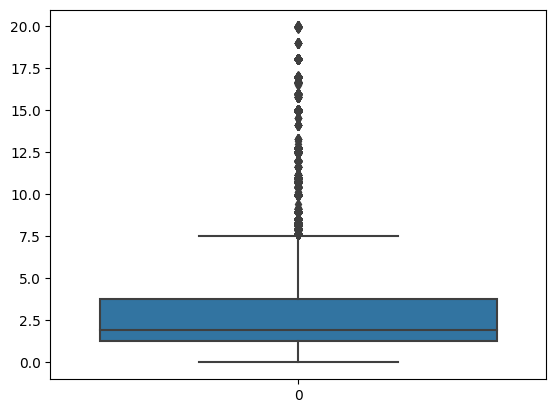

In [ ]:
sns.boxplot(data['UnitPrice'])
count, perc = get_outlier_count_and_percentage(data, 'UnitPrice')
print(f"Outliers in Sales : {count} ({perc}%)")

### From the description and distribution plots above, it is seen that outliers do exist.

##Feature Transformation

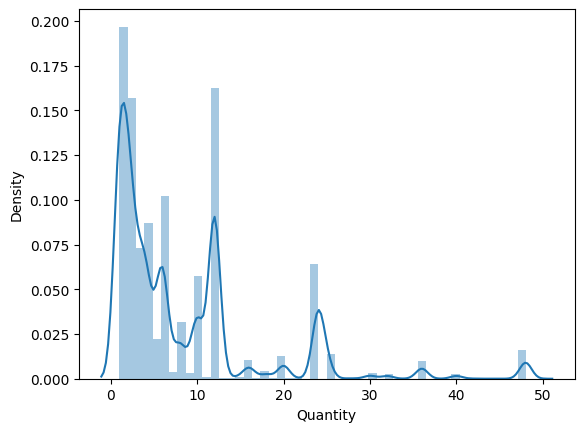

In [ ]:
# Distribution of the Quantity column
sns.distplot(data['Quantity'])
plt.show()

The quantity distribution is positively skewed, it can be removed by log tranformation
Since, log transformation cannot be  done if the value of any data is 0.
So,we will check the transformation for data whose value 1 or greater than 1.

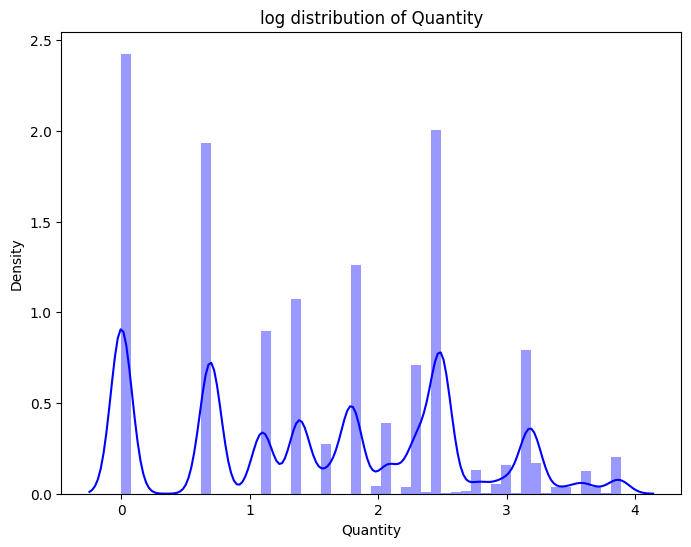

In [ ]:
data_log = data[data['Quantity'] >= 1]
plt.figure(figsize=(8,6))
plt.title('log distribution of Quantity')
sns.distplot(np.log(data_log['Quantity']),color="b")
plt.show()

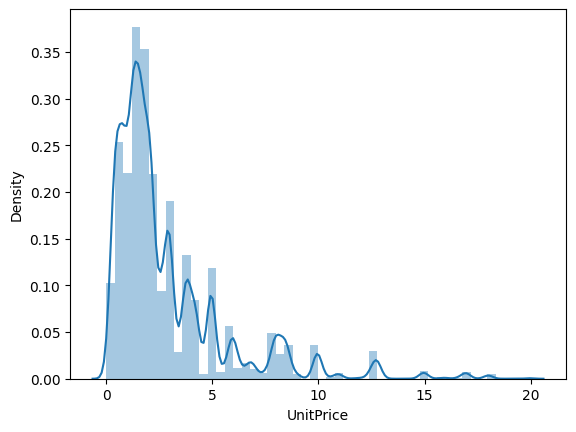

In [ ]:
# Distribution of the Quantity column
sns.distplot(data['UnitPrice'])
plt.show()

The UnitPrice distribution is positively skewed, it can be removed by log tranformation
Since, log transformation cannot be  done if the value of any data is 0.
So,we will check the transformation for data whose value is equal to 1 or greater than 1.

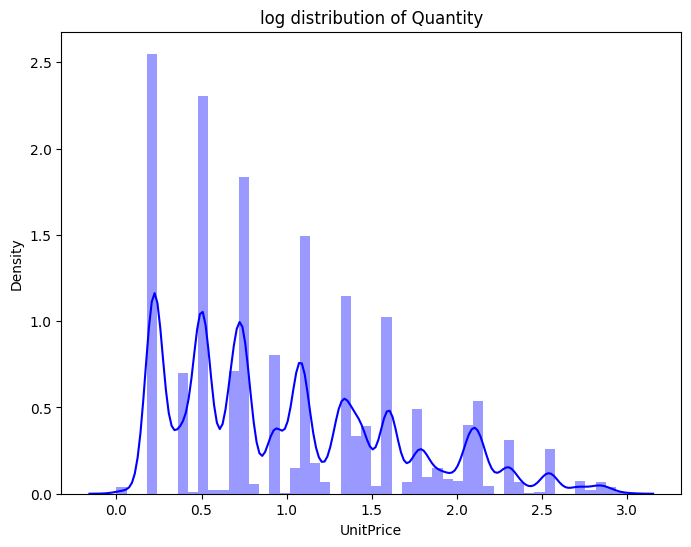

In [ ]:
data_log = data[data['UnitPrice'] >= 1]
plt.figure(figsize=(8,6))
plt.title('log distribution of Quantity')
sns.distplot(np.log(data_log['UnitPrice']),color="b")
plt.show()

## 3. **Data Transformation**

### For the purpose of this project - Recency, Frequency and Monetory (RFM) analysis shall be conducted. On the basis of these 3 factors, customers can be classified into different groups. They can be catered by the business depending on the cluster they belong to.

### In this section, an RFM dataframe would be conducted which can be further used in a model for clustering.

In [ ]:
# Creating an invoice date column
data['InvoiceDate'] = pd.to_datetime(data[['Day', 'Month', 'Year']])

### Recency

### Here, the most recent order of customers is identified.

In [ ]:
# Most recent date in the dataset
latest_date = max(data['InvoiceDate'])

In [ ]:

# Creating a dataframe to find the most recent purchase
recency_df = pd.DataFrame(data.groupby('CustomerID').max()['InvoiceDate'], columns = ['InvoiceDate'])
recency_df.reset_index(inplace = True)

In [ ]:
# Calculating days from most recent purchase
recency_df['Recency'] = recency_df['InvoiceDate'].apply(lambda x: (latest_date - x).days)
recency_df = recency_df.loc[: , ['CustomerID', 'Recency']]

### Frequency


### Frequency of purchases by the customers will be calculated.

### Frequency would be calculated with the number of unique invoice numbers, which means the number of different times the customer has been billed for the items bought. This would explain the frequency of sales to the customer.

In [ ]:
# Creating a frequency dataframe
freq_df = pd.DataFrame(data = data.groupby('CustomerID').nunique()['InvoiceNo'])
freq_df.reset_index(inplace = True)
freq_df.columns = ['CustomerID', 'Frequency']

### Monetary

### Here, the sum of billed value for each customer will be calculated.

In [ ]:
# Creating a dataframe with total billed amount
monetary_df = data.loc[:,['CustomerID', 'Quantity', 'UnitPrice']]
monetary_df['TotalAmount'] = monetary_df.loc[:,'Quantity'] * monetary_df.loc[:,'UnitPrice']

In [ ]:
# Grouping by customer ID to find total billed amount per customer
monetary_df = pd.DataFrame(monetary_df.groupby('CustomerID').sum()['TotalAmount'])
monetary_df.reset_index(inplace = True)
monetary_df.columns = ['CustomerID', 'Monetary']

### After creating 3 dataframes for recency, frequency and monetary, each grouped on the basis of customer ID, these can be now merged into one dataframe.

In [ ]:
# Merging 3 dataframes to form an RFM dataframe
rec_fre = recency_df.merge(freq_df, on = 'CustomerID' )
rfm_df = rec_fre.merge(monetary_df, on = 'CustomerID')

In [ ]:
# First 5 rows of the RFM dataframe
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary
0,12347,2,7,4060.40
1,12348,248,3,200.60
2,12349,18,1,1417.60
3,12350,310,1,294.40
4,12352,36,7,1385.74


In [ ]:
# Information of the RFM dataframe
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4255 entries, 0 to 4254
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4255 non-null   int64  
 1   Recency     4255 non-null   int64  
 2   Frequency   4255 non-null   int64  
 3   Monetary    4255 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 166.2 KB


In [ ]:
# Number of unique customer ID in the original dataframe
data['CustomerID'].nunique()

4255

### As seen the number of unique customer IDs in the original dataframe match the RFM dataframe. Hence, we have accounted for all the customers.

In [ ]:

# Making the customer ID the index of the dataframe
rfm_df.set_index('CustomerID', inplace= True)

In [ ]:
# Statistical Description of the RFM dataset
rfm_df.describe()

,Recency,Frequency,Monetary
count,4255.000000,4255.000000,4255.000000
mean,91.980494,4.140541,1399.748408
std,100.023050,7.338481,3284.226844
min,0.000000,1.000000,2.900000
25%,17.000000,1.000000,276.270000
50%,50.000000,2.000000,616.150000
75%,142.000000,5.000000,1470.015000
max,373.000000,205.000000,118947.930000


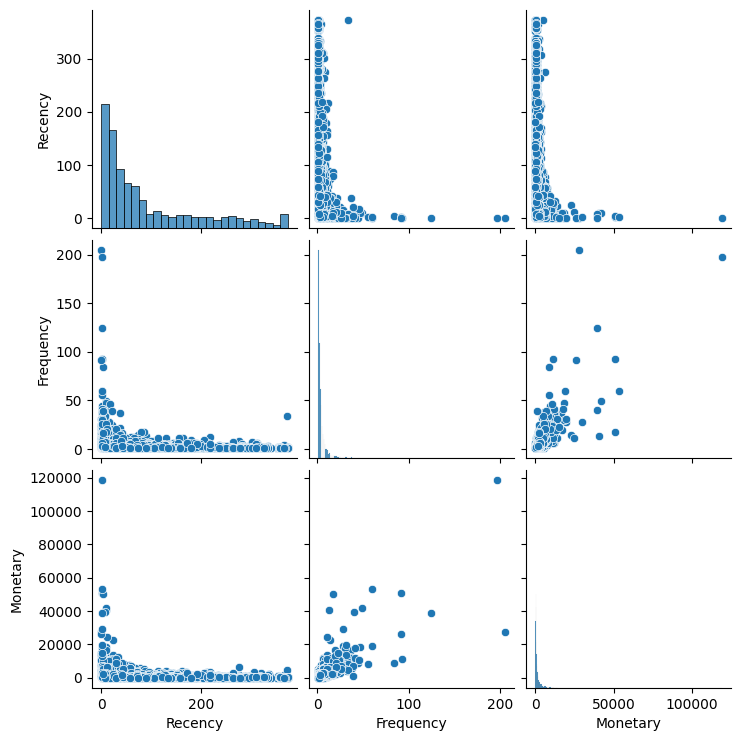

In [ ]:
# Graphical representation of the relation between recency, frequency and monetary
sns.pairplot(rfm_df)

### The above pairplot explains the relation between recency, frequency and monetory variables. Each data point represents a customer. It can be seen that :-

*   There are many recent purchaces with higher monetary value than older purchases.
*   Frequency of orders have been higher recently.
*   Frequency and monetary variables have slight linear trend.



Outliers in Recency : 150 (3.53%)
Outliers in Frequency : 254 (5.97%)
Outliers in Monetary : 410 (9.64%)




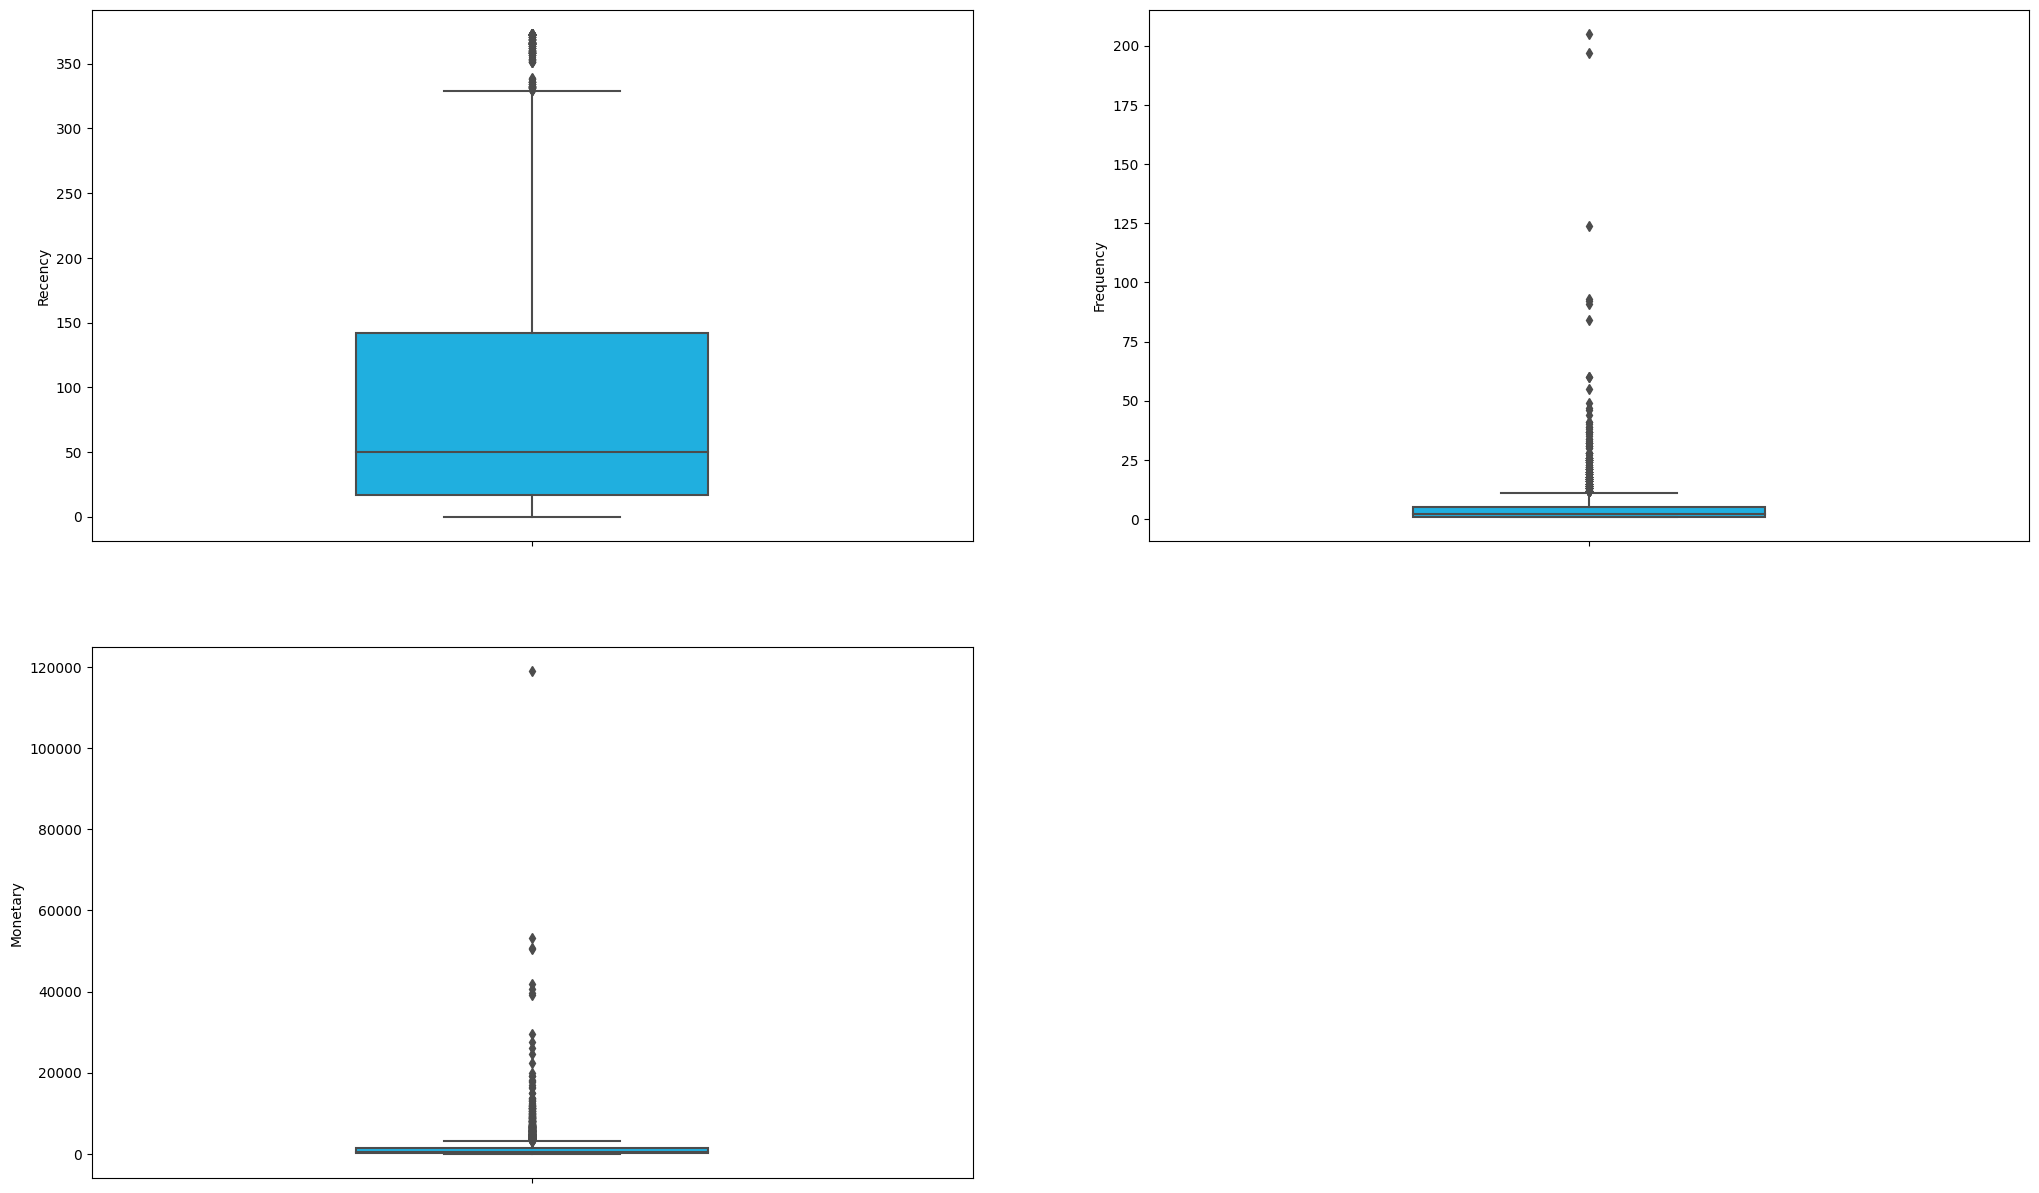

In [ ]:
# looking for outliers using box plot
plt.figure(figsize=(25,40))
for index,item in enumerate([i for i in rfm_df.describe().columns.to_list()] ):
  count, perc = get_outlier_count_and_percentage(rfm_df,item)
  print(f"Outliers in {item} : {count} ({perc}%)")
  plt.subplot(5,2,index+1)
  sns.boxplot(y=item, data=rfm_df, color="#00BFFF", width=0.4)
print("\n")

### There are some customers who are potential outliers, but these cannot be removed because, for example there is a customer how very recently has had a very high billing value. He could be vital to the business. There is also another customer who has frequently billed a high value. Hence, if these are removed, business could miss classifying their main customers, who could potentially be of high value in the future also.However there are very extreme outliers in the frequency and monetary we can remove this for better clustering

In [ ]:
rfm_df = rfm_df[(rfm_df['Frequency'] <=100) & (rfm_df['Monetary'] <= 60000)]

Outliers in Recency : 150 (3.53%)
Outliers in Frequency : 251 (5.9%)
Outliers in Monetary : 408 (9.6%)




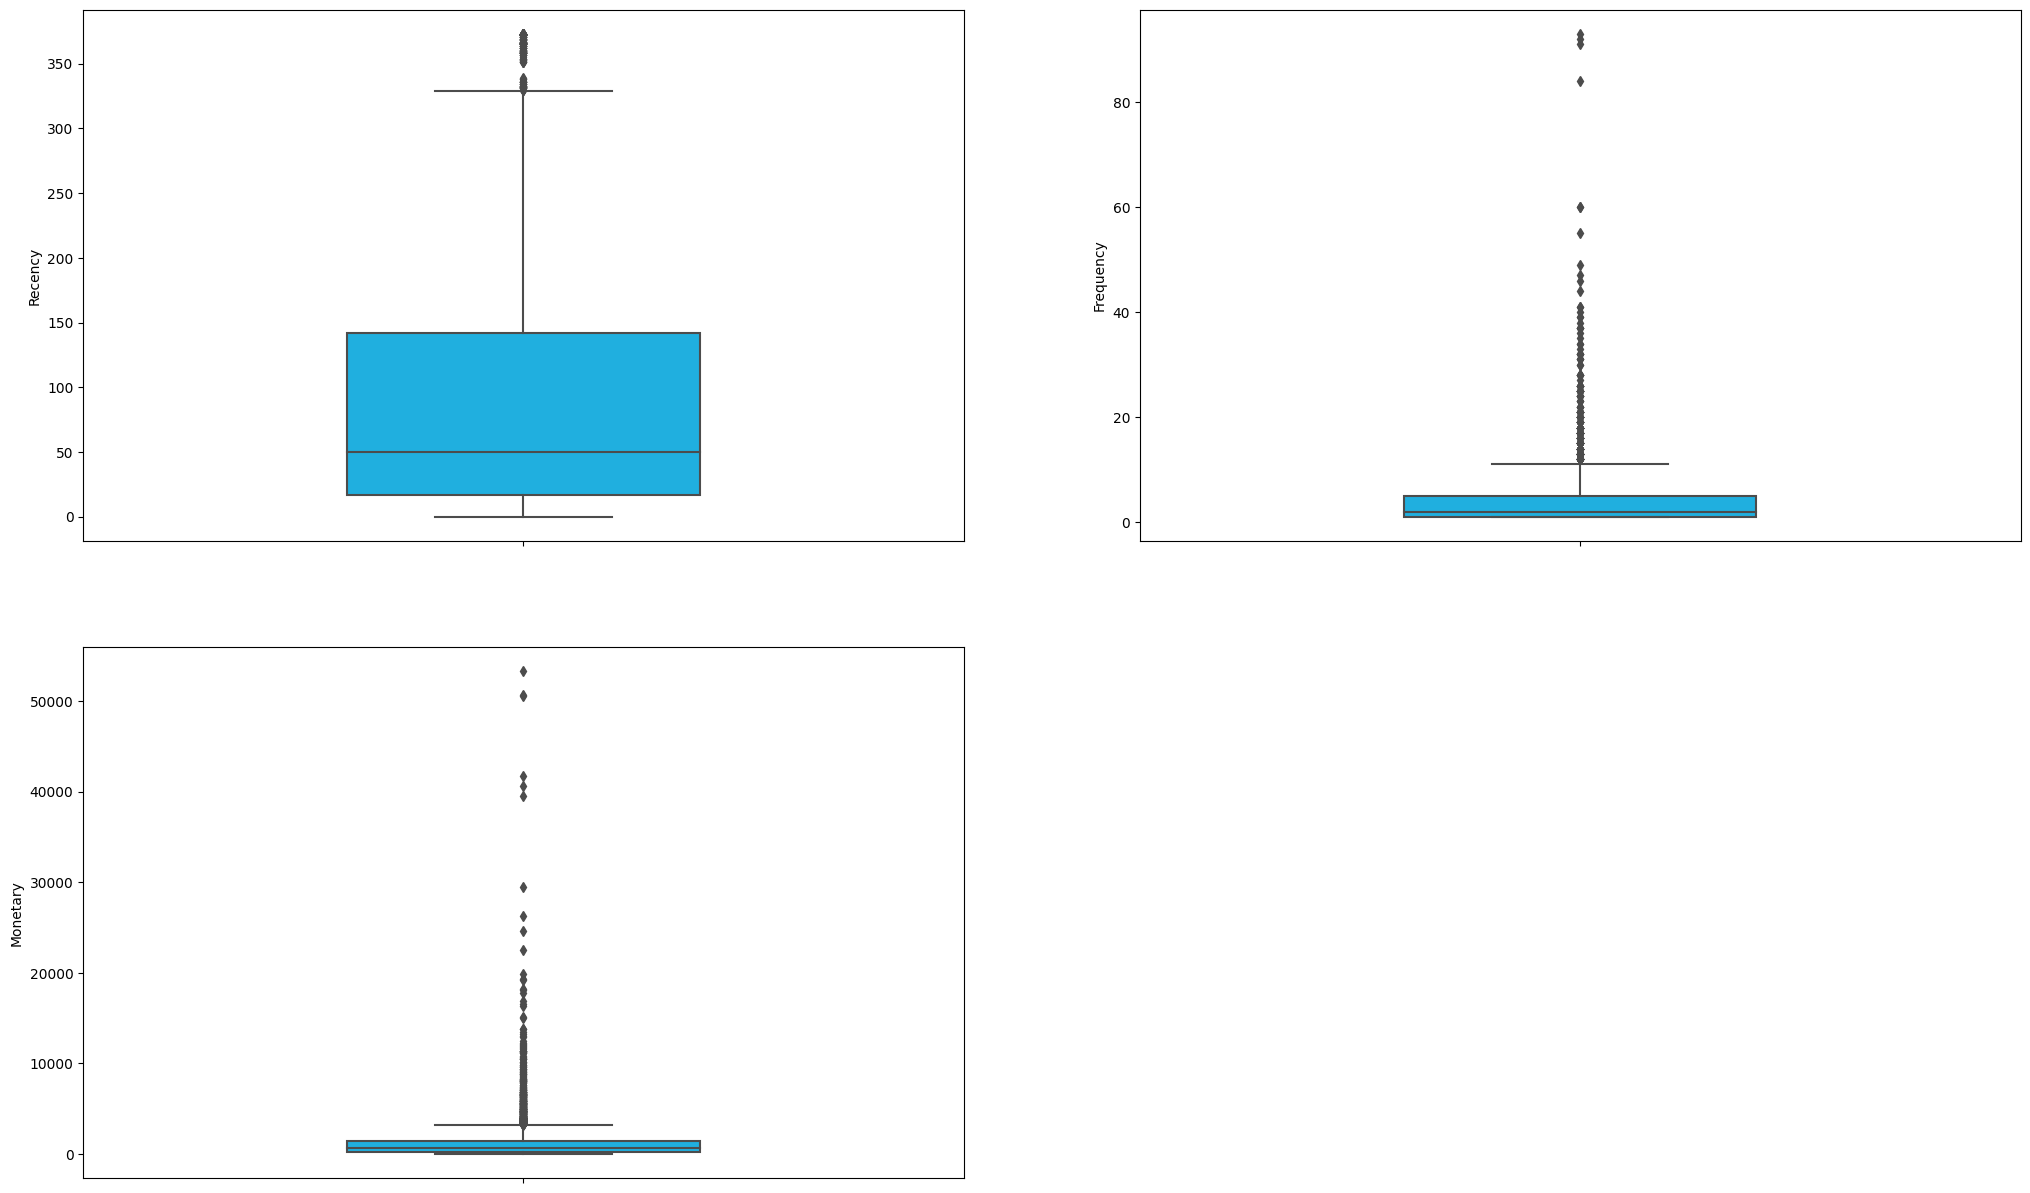

In [ ]:
# looking for outliers using box plot
plt.figure(figsize=(25,40))
for index,item in enumerate([i for i in rfm_df.describe().columns.to_list()] ):
  count, perc = get_outlier_count_and_percentage(rfm_df,item)
  print(f"Outliers in {item} : {count} ({perc}%)")
  plt.subplot(5,2,index+1)
  sns.boxplot(y=item, data=rfm_df, color="#00BFFF", width=0.4)
print("\n")

##Feature Transformation
We can see that from boxplot Monetary,recency and Frequency is positively skewed.So,we will apply the log tranformation to them and recency and Monetary contains 0 value so will convert 0 to 1 as log tranformation cannot be done if the column has 0 values

In [ ]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 1:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns
rfm_df['Recency'] = [handle_neg_n_zero(x) for x in rfm_df.Recency]
rfm_df['Monetary'] = [handle_neg_n_zero(x) for x in rfm_df.Monetary]
#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

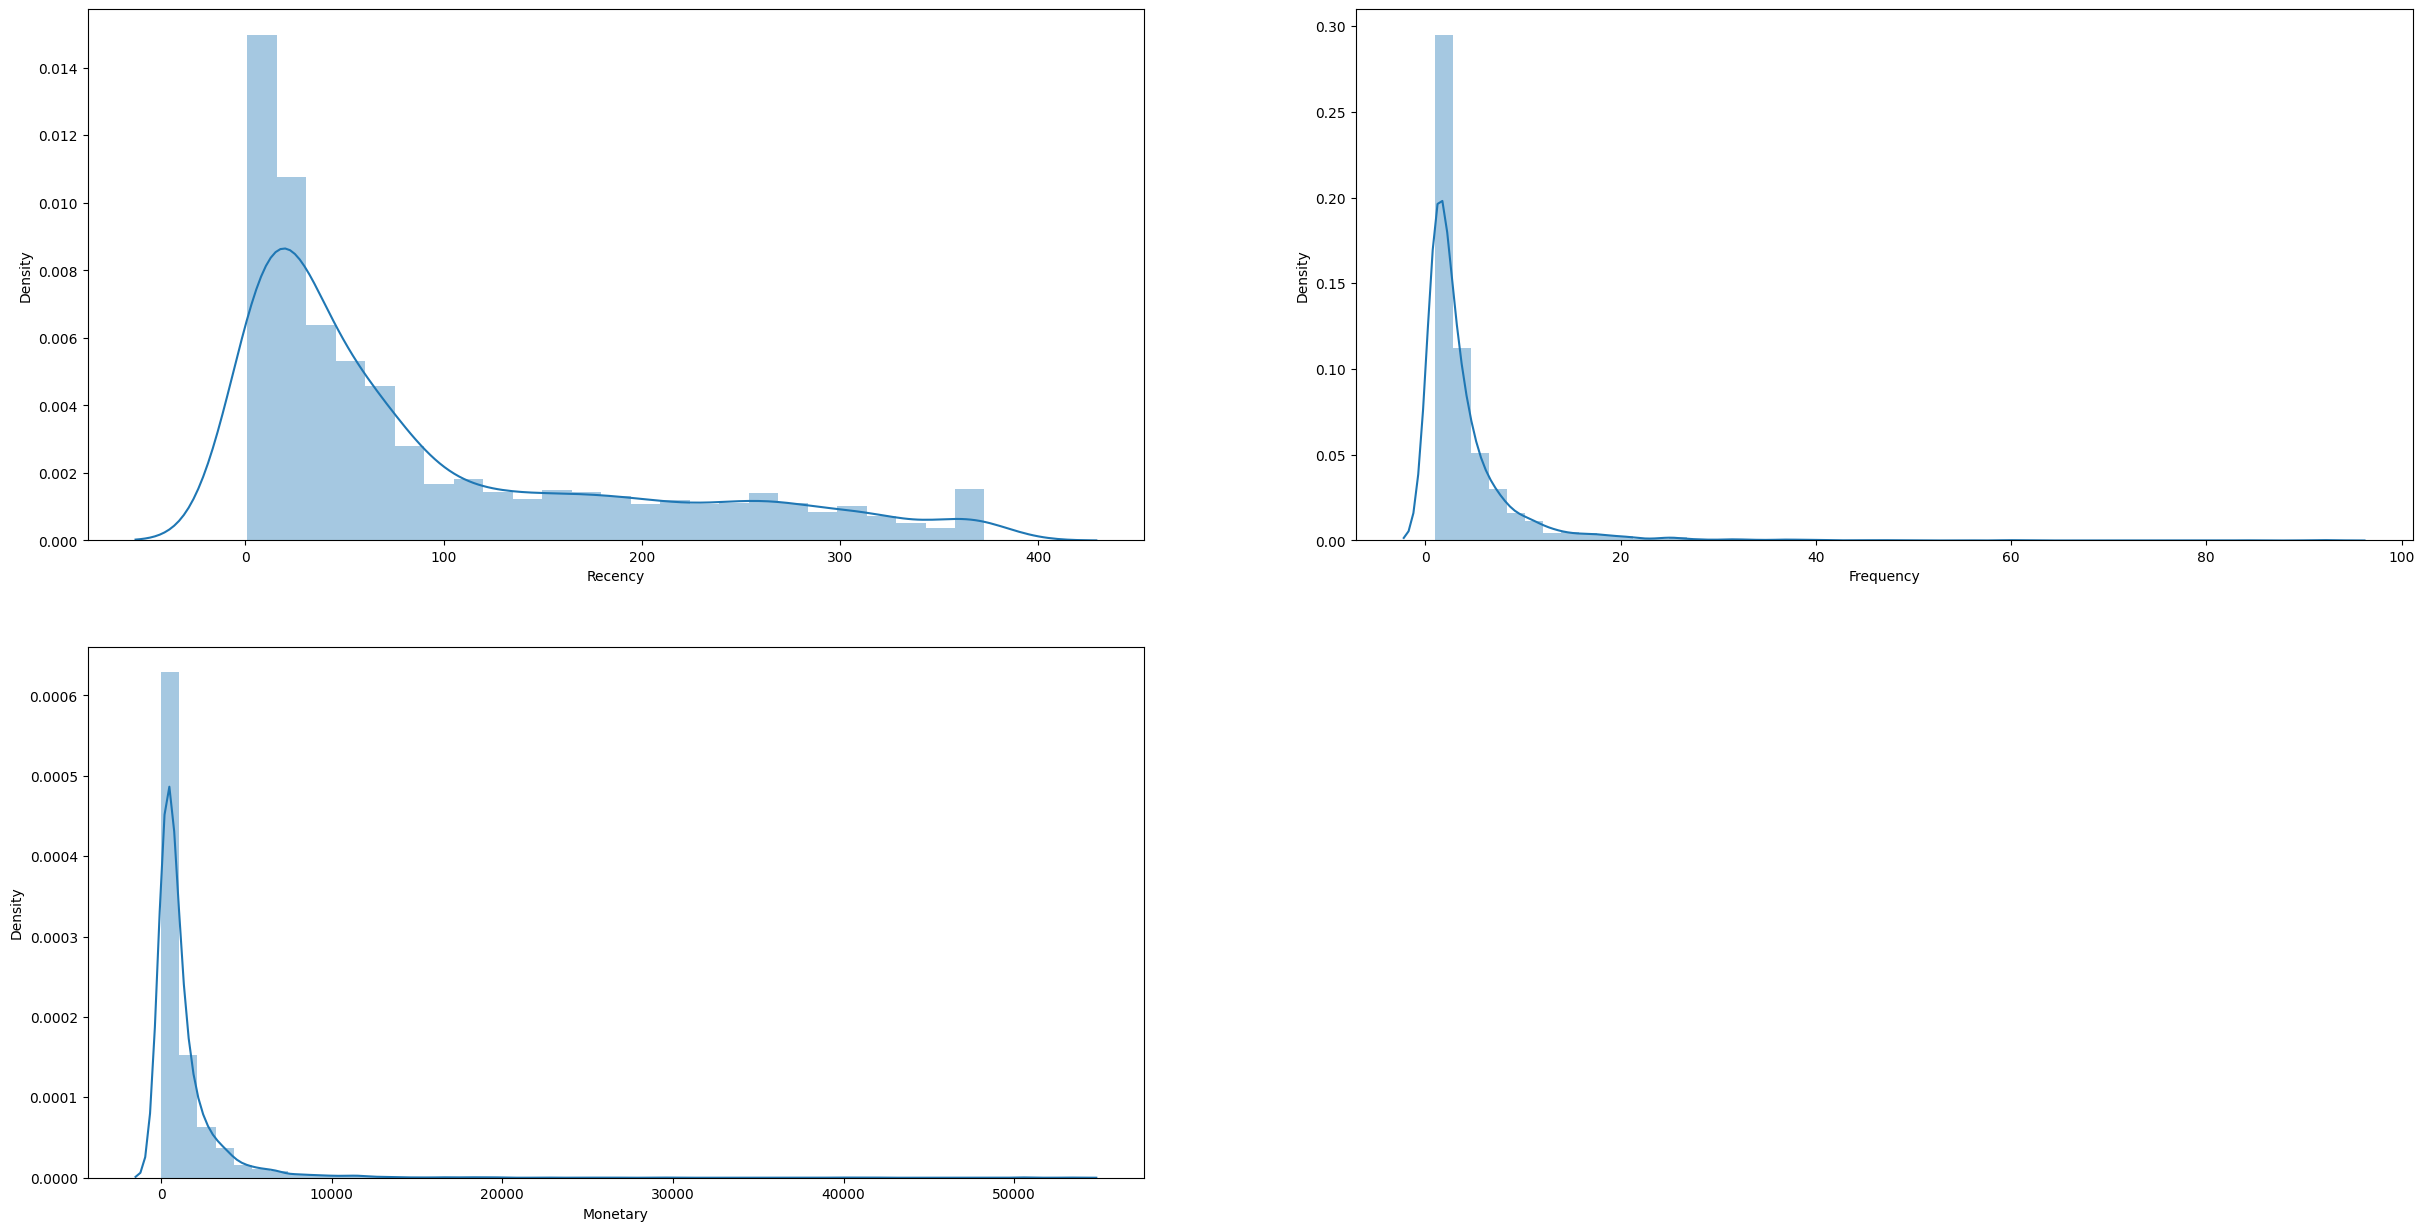

In [ ]:
#Data distribution after data normalization for Recency
plt.figure(figsize=(30,40))
for index,item in enumerate([i for i in rfm_df.describe().columns.to_list()] ):
  plt.subplot(5,2,index+1)
  sns.distplot(rfm_df[item])

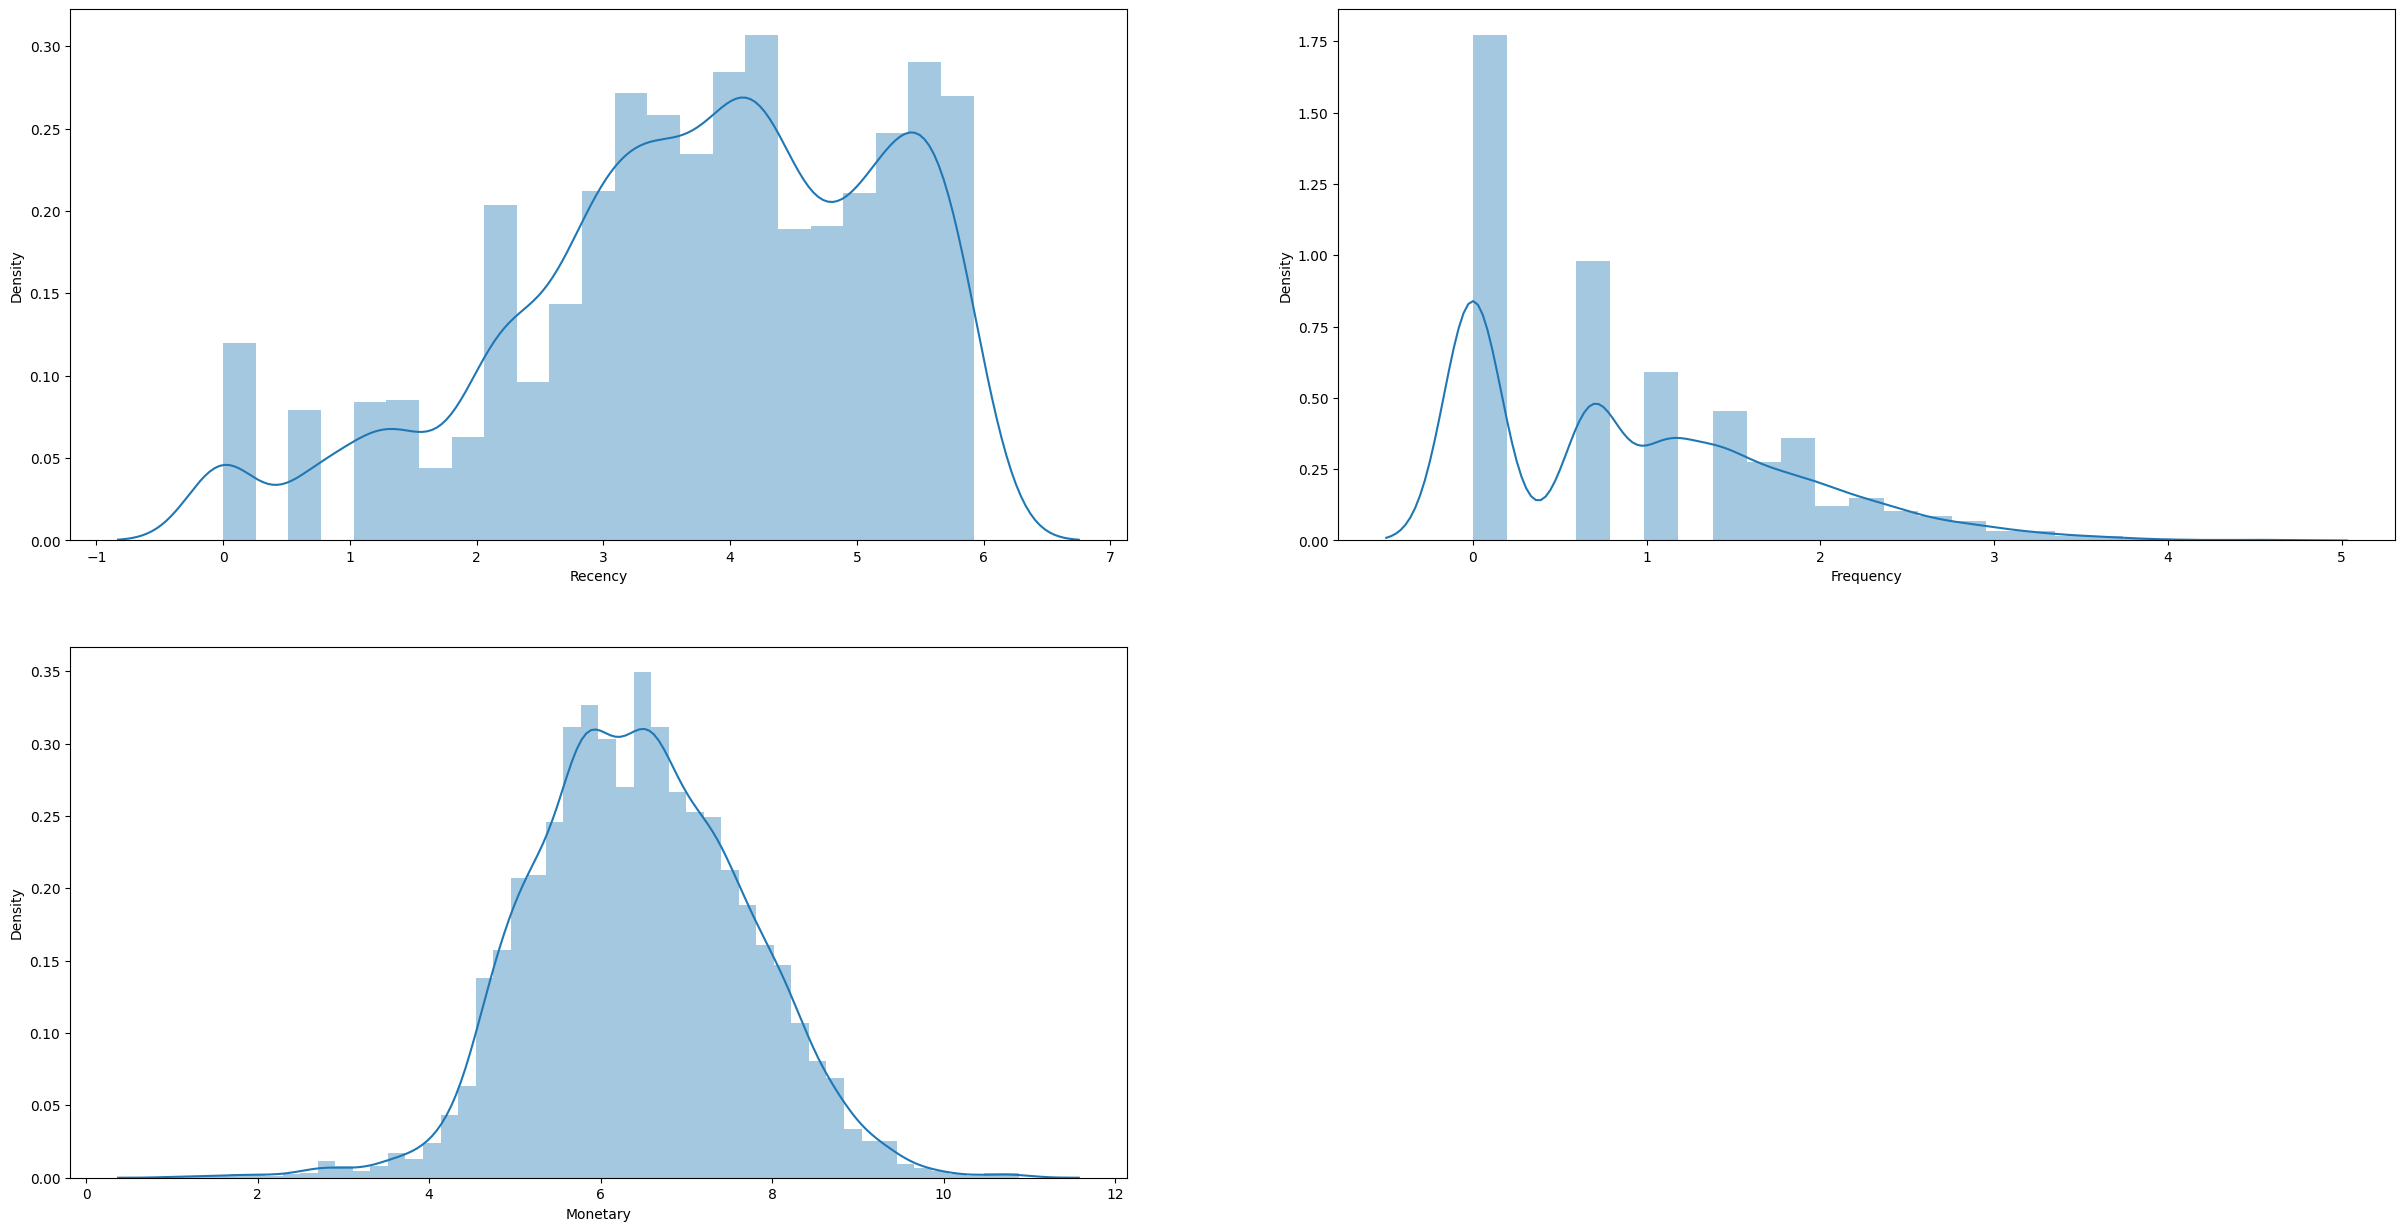

In [ ]:
#Data distribution after data normalization for Recency
plt.figure(figsize=(30,40))
for index,item in enumerate([i for i in Log_Tfd_Data.describe().columns.to_list()] ):
  plt.subplot(5,2,index+1)
  sns.distplot(Log_Tfd_Data[item])


### The values in the columns have different ranges which can impact analysis, hence, we will scale all the values to one common range

In [ ]:
# Importing the scaler
from sklearn.preprocessing import StandardScaler, Normalizer

In [ ]:
# Creating a copy of the rfm dataframe
rfm_df_copy = rfm_df.copy()

In [ ]:
# Scaling the dataframe
scaler = StandardScaler()
normal = Normalizer()
scaled_data = scaler.fit_transform(rfm_df_copy)
scaled_data = normal.fit_transform(scaled_data)
rfm_scaled = pd.DataFrame(scaled_data, columns = ['Recency','Frequency','Monetary'])
rfm_scaled.set_index(rfm_df_copy.index, inplace=True)

In [ ]:
# First 5 rows of the scaled data
rfm_scaled.head()

,Recency,Frequency,Monetary
CustomerID,,,
12347,-0.617865,0.360111,0.698973
12348,0.957230,-0.110235,-0.267504
12349,-0.811990,-0.583135,0.025014
12350,0.956379,-0.233364,-0.175725
12352,-0.729879,0.683431,0.014071


## 4. **Clustering**

##**KMeans**

In [ ]:
# Importing libraries necessary for clustering
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score

In [ ]:
# Creating an instance of the model
kmeans = KMeans()

### KMeans requires the number of clusters to be specified during the model building process. To know the right number of clusters, methods such as elbow method and silhouette analysis can be used. These methods will help in selection of the optimum number of clusters.

### Elbow Method

In [ ]:
# Using the elbow method to find out optimum number of clusters, with different metrics
def elbow_method(X):
  ''' Displays elbow curves with different metrics '''

  metrics = ['distortion', 'calinski_harabasz', 'silhouette']

  for m in metrics:
    visualizer = KElbowVisualizer(kmeans, k = (2,10), metric = m)
    visualizer.fit(X)
    visualizer.poof()

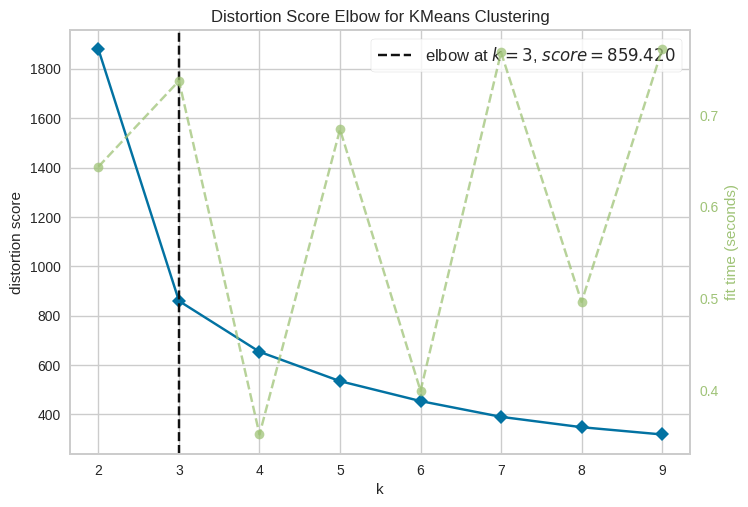

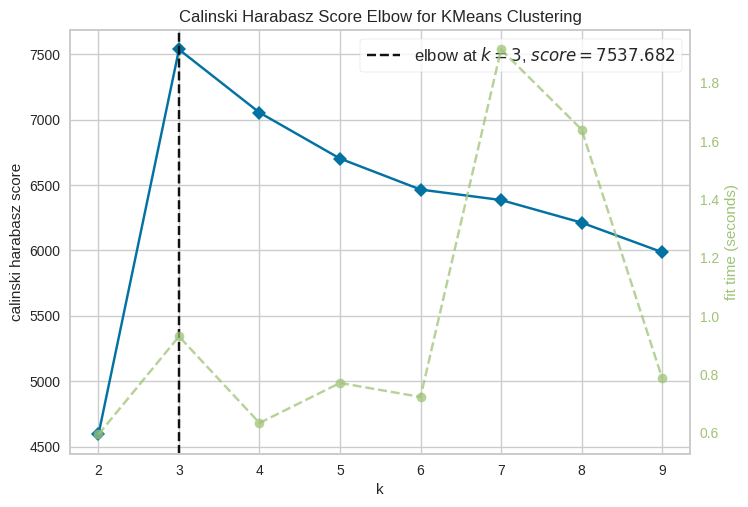

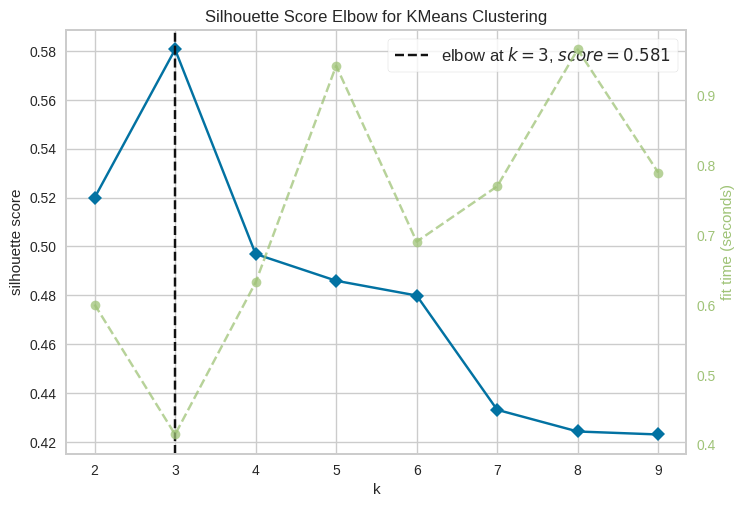

In [ ]:
# Using the elbow method function to understand optimum number of clusters
elbow_method(rfm_scaled)

### Silhouette Analysis

In [ ]:
# Creating a function to calculate silhouette scores
def sil_score(input, i):
  ''' Returns a dataframe with sillhouette scores of different clusters in the data '''

  sil_df = pd.DataFrame(columns = ['Clusters', 'Silhouette Score'])

  for k in range(2,i+1):
    kmeans = KMeans(n_clusters = k)
    labels = kmeans.fit_predict(input)
    score = silhouette_score(input, labels)
    sil_df = sil_df.append({'Clusters' : k,
                            'Silhouette Score' : score}, ignore_index = True)

  return sil_df

In [ ]:
# Using the function to display silhoutte scores at different number of clusters
sil_score(rfm_scaled,10)

,Clusters,Silhouette Score
0,2.0,0.519950
1,3.0,0.580663
2,4.0,0.498186
3,5.0,0.485991
4,6.0,0.479926
5,7.0,0.433104
6,8.0,0.425016
7,9.0,0.419886
8,10.0,0.397676


In [ ]:
# Creating a function for silhouette plot visualization
def sil_visual(input, j):
  ''' Visualize the silhouette plot with different clusters'''

  for k in range(2,j+1):
    kmeans = KMeans(n_clusters = k)
    visualizer = SilhouetteVisualizer(kmeans)
    visualizer.fit(input)
    visualizer.poof()

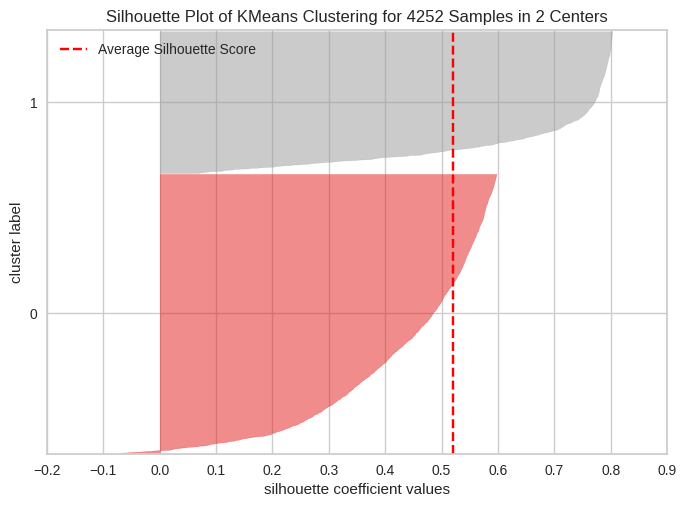

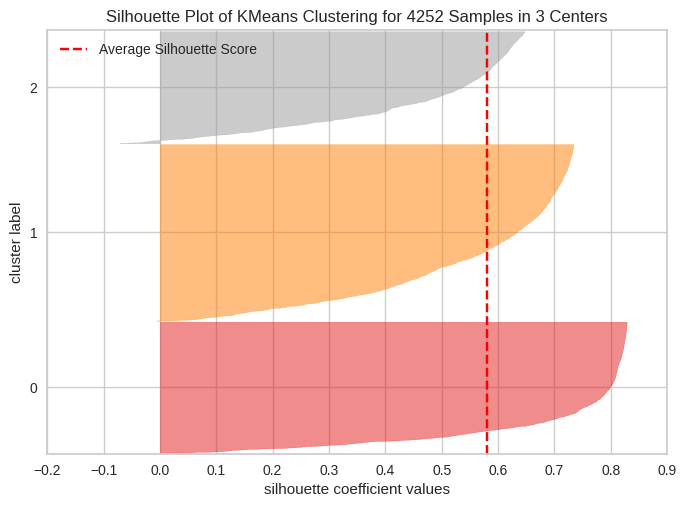

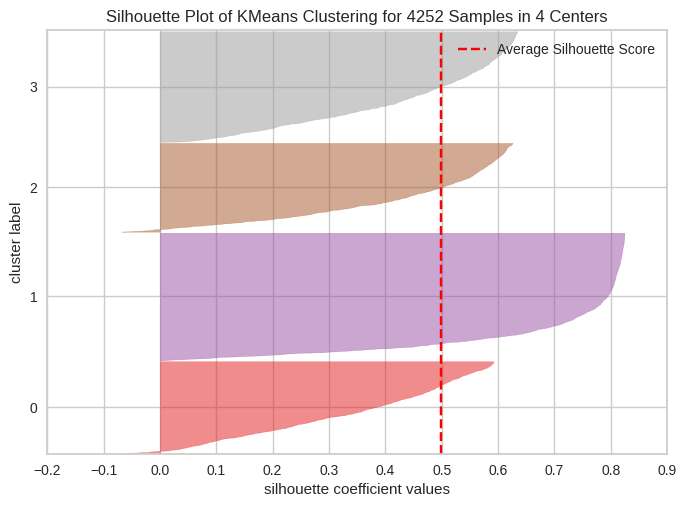

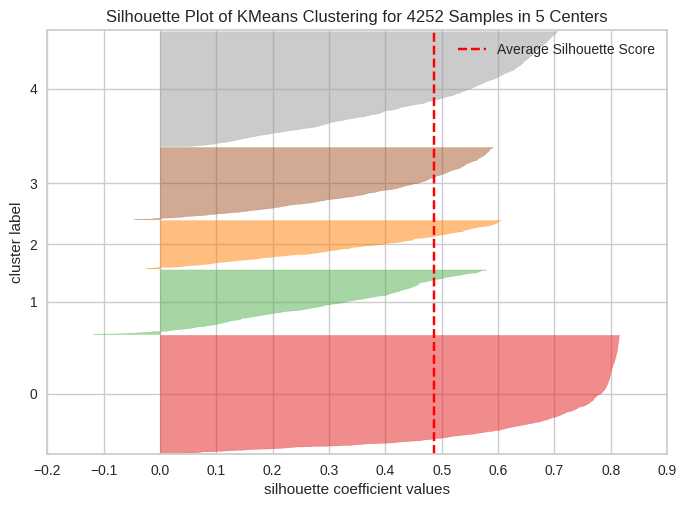

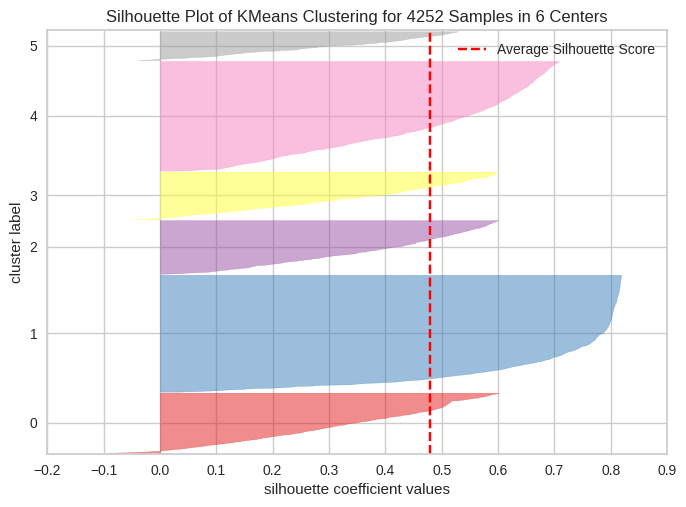

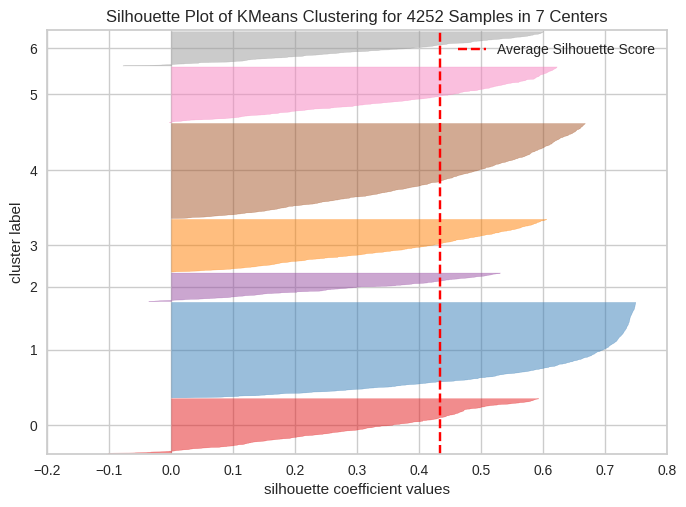

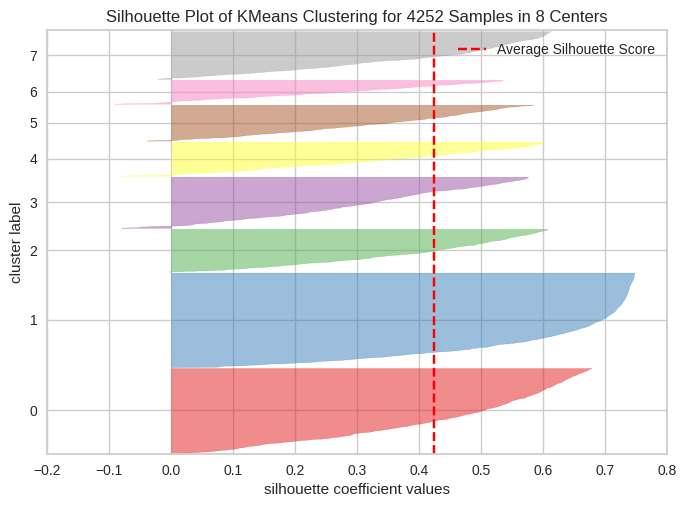

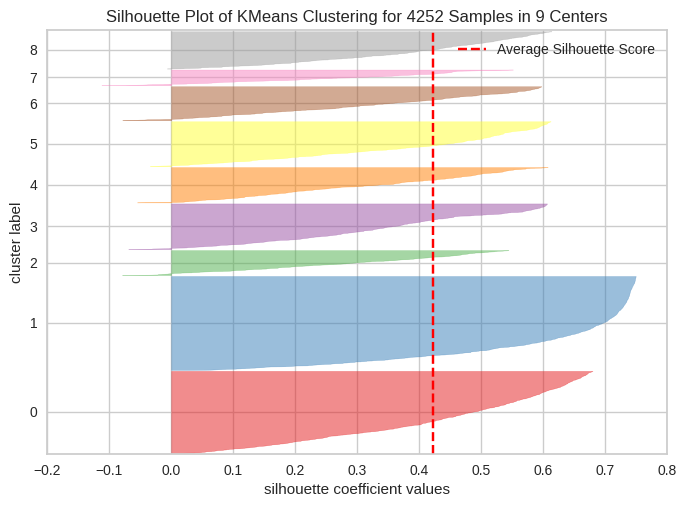

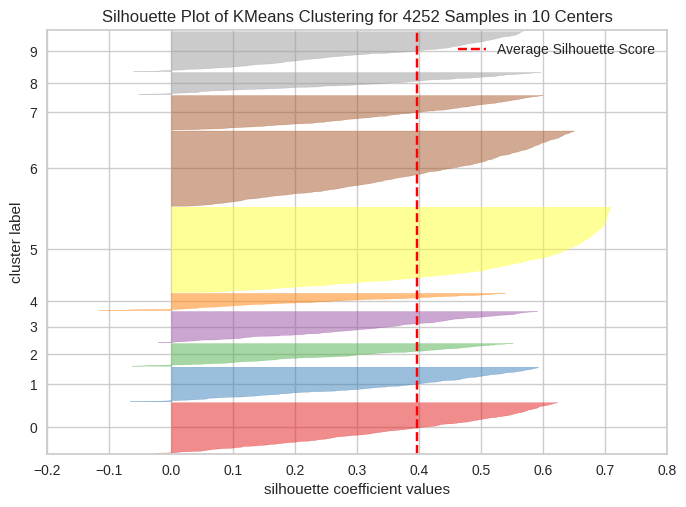

In [ ]:
# Applying the silhouette visualization function for different clusters.
sil_visual(rfm_scaled, 10)

### From the elbow method and silhouette analysis, it is clearly understood that, 3 clusters is performing the best. Hence, 3 clusters will be selected to build the KMeans model and classify the customers.

### Building the KMeans Model

In [ ]:
# KMeans with 3 clusters
kmeans = KMeans(n_clusters = 3, random_state=10)

In [ ]:
# Fitting the model to the data
kmeans.fit(rfm_scaled)

KMeans(n_clusters=3, random_state=10)

### Now predictions of the clusters can be made, these predictions can be represented as a column in the RFM dataframe, which can help in profiling the clusters

In [ ]:
# Creating cluster labels for the data and appending it to the RFM dataframe
labels = kmeans.predict(rfm_scaled)
rfm_df_copy['Cluster_kmeans'] = labels

In [ ]:
# First 5 rows of the RFM dataframe after adding the cluster column
rfm_df_copy.head()

,Recency,Frequency,Monetary,Cluster_kmeans
CustomerID,,,,
12347,2,7,4060.40,2
12348,248,3,200.60,1
12349,18,1,1417.60,0
12350,310,1,294.40,1
12352,36,7,1385.74,2


In [ ]:
# Grouping by clusters to understand the profiles
rfm_df_copy.groupby('Cluster_kmeans').mean()

,Recency,Frequency,Monetary
Cluster_kmeans,,,
0,39.024581,2.125140,574.237544
1,220.784048,1.687735,463.791212
2,24.827891,9.748455,3641.635463


In [ ]:
# Number of customers belonging to each cluster
rfm_df_copy['Cluster_kmeans'].value_counts()

0    1790
1    1329
2    1133
Name: Cluster_kmeans, dtype: int64

### The business has to pay attention to their high value and loyal customers as they bring in the bulk of business. Average value customers can be given more offers in order for them to be more frequent and regular. Casual customers do have an average monetary value but low recency and frequency. They too could be offered more offers in order attract them. They can be offered some services to improve their recency and frequency.


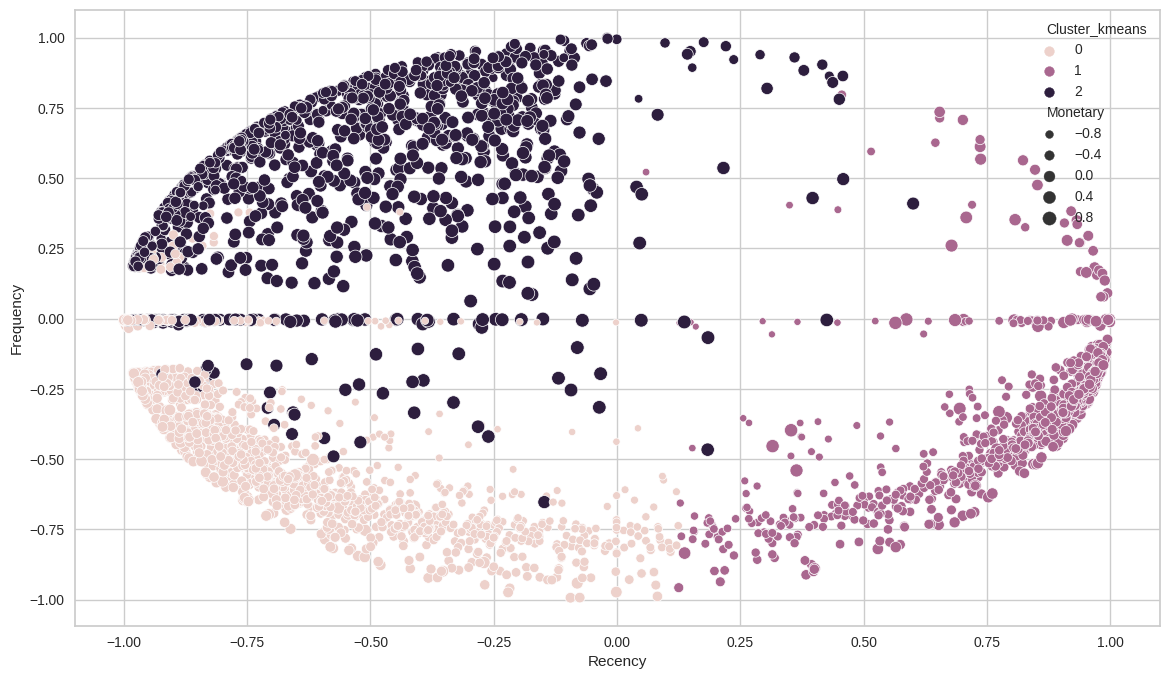

In [ ]:
# Creating a scatter plot to understand the clusters visually
rfm_scaled_index =rfm_scaled.reset_index()
rfm_scaled_index =rfm_scaled_index[['Recency','Frequency','Monetary']]
rfm_scaled_index['Cluster_kmeans'] = labels
plt.figure(figsize = (14,8))
sns.scatterplot(x = rfm_scaled_index['Recency'], y = rfm_scaled_index['Frequency'], size= rfm_scaled_index['Monetary'], hue = rfm_scaled_index['Cluster_kmeans'])
plt.show()

## **Cluster Profiling**

### By grouping RFM dataframe on the basis of clusters, and using mean to summarize the variables we understand that :-
### 1. Cluster 0 comprises of customers who are moderately recent, frequent and contribute an average amount to sales
### 2. Cluster 1 comprises of customers who made purchaces a long time ago and purchase infrequently and contribute the least towards the sales of the company
### 3. Cluster 2 comprises of customers who are very recent, frequent and also contribute largely to the sales.

### We can name these clusters as follows :-
### Cluster 0 can be named average value and ordinary customers.
### Cluster 1 can be named low value and casual customers.
### Cluster 2 can be named high value and loyal customers.



In [ ]:
rfm_df_copy.loc[rfm_df_copy['Cluster_kmeans'] == 0, 'Cluster_kmeans'] = 'average & ordinary'
rfm_df_copy.loc[rfm_df_copy['Cluster_kmeans'] == 1, 'Cluster_kmeans'] = 'low & casual'
rfm_df_copy.loc[rfm_df_copy['Cluster_kmeans'] == 2, 'Cluster_kmeans'] = 'high & loyal'
rfm_df_copy

,Recency,Frequency,Monetary,Cluster_kmeans
CustomerID,,,,
12347,2,7,4060.40,high & loyal
12348,248,3,200.60,low & casual
12349,18,1,1417.60,average & ordinary
12350,310,1,294.40,low & casual
12352,36,7,1385.74,high & loyal
...,...,...,...,...
18280,277,1,180.60,low & casual
18281,180,1,80.82,low & casual
18282,7,2,178.05,average & ordinary


## **Heirarchical Clustering**

In [ ]:
# Library import for dendrogram
import scipy.cluster.hierarchy as shc

### Denodogram Analysis

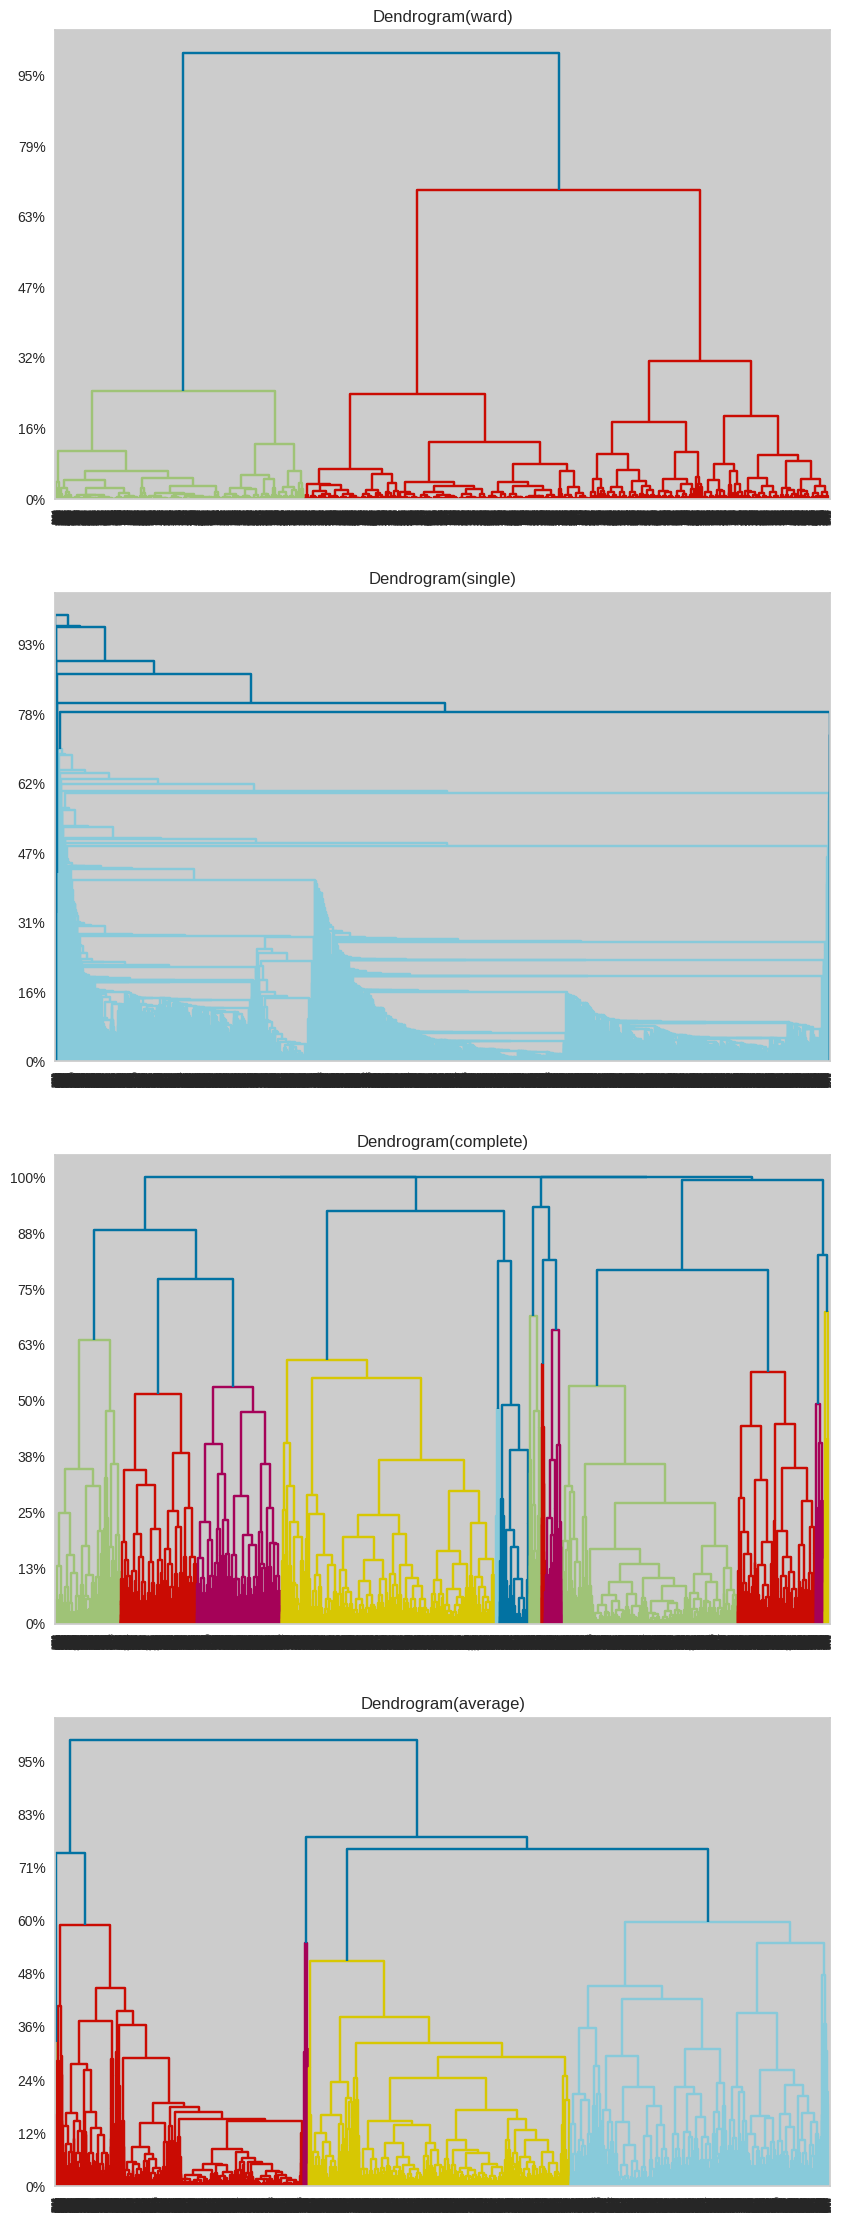

In [ ]:
# Creating a dendrogram to visualize the clusters
method = ['ward','single','complete','average']
fig, axes = plt.subplots(4, 1, figsize=(10,28))
for i,j in enumerate(method):
  z =shc.linkage(rfm_scaled, method=j)
  dn1 = shc.dendrogram(z,ax=axes[i])
  axes[i].set_title(f'Dendrogram({j})' )
  axes[i].yaxis.set_major_formatter(mtick.PercentFormatter(xmax= max(z[:,2])))

### From the above dendrogram, it is clearly seen that ward method is an optimum choice as it cluster's the data clearly and more separately.In average and complete at same distances there are high number of clusters and in single all the dataset has gone into one cluster and very few are in other cluster

### Now checking optimum number of clusters for heirarchial clustering

In [ ]:
# Creating a function to calculate silhouette scores
def sil_score(input, i):
  ''' Returns a dataframe with sillhouette scores of different clusters in the data '''

  sil_df = pd.DataFrame(columns = ['Clusters', 'Silhouette Score'])

  for k in range(2,i+1):
    kmeans = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'ward')
    labels = kmeans.fit_predict(input)
    score = silhouette_score(input, labels)
    sil_df = sil_df.append({'Clusters' : k,
                            'Silhouette Score' : score}, ignore_index = True)

  return sil_df

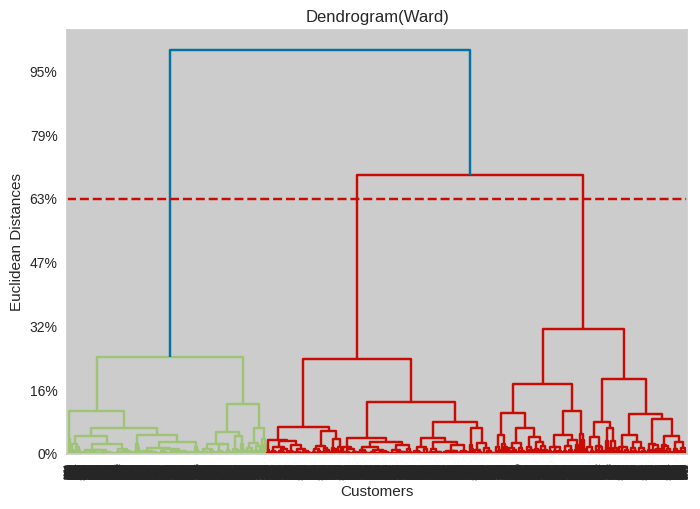

In [ ]:
import matplotlib.ticker as mtick
z =shc.linkage(rfm_scaled, method='ward')
dendrogram = shc.dendrogram(z)
plt.title('Dendrogram(Ward)')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(y=40, color='r', linestyle='--')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax= max(z[:,2])))


### Silhoutte Analysis

In [ ]:
sil_score(rfm_scaled,10)

,Clusters,Silhouette Score
0,2.0,0.518650
1,3.0,0.549241
2,4.0,0.500661
3,5.0,0.436785
4,6.0,0.399488
5,7.0,0.401470
6,8.0,0.401609
7,9.0,0.367218
8,10.0,0.355250


### It is seen from silhoutte score and dendograms distance that 3 cluster is optimum for hierarchical cluster also

In [ ]:
# Fitting hierarchical clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(rfm_scaled)
rfm_df_copy['Cluster_heirarchical'] = y_hc

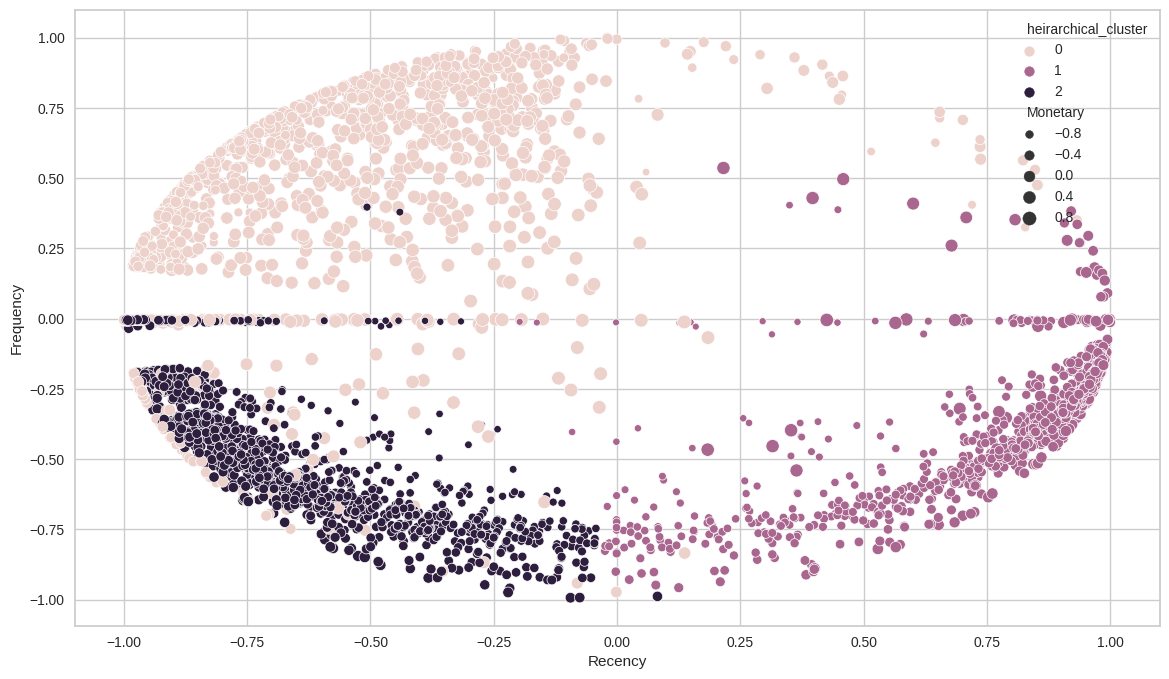

In [ ]:
# Creating a scatter plot to understand the clusters visually
rfm_scaled_index =rfm_scaled.reset_index()
rfm_scaled_index =rfm_scaled_index[['Recency','Frequency','Monetary']]
rfm_scaled_index['heirarchical_cluster'] =y_hc
plt.figure(figsize = (14,8))
sns.scatterplot(x = rfm_scaled_index['Recency'], y = rfm_scaled_index['Frequency'], size= rfm_scaled_index['Monetary'], hue = rfm_scaled_index['heirarchical_cluster'])
plt.show()

##  **Cluster Profiling**

### By grouping RFM dataframe on the basis of clusters, and using mean to summarize the variables we understand that :-
### 1. Cluster 0 comprises of customers who are very recent, frequent and also contribute largely to the sales.
### 2. Cluster 1 comprises of customers who made purchaces a long time ago and purchase infrequently and contribute the least towards the sales of the company
### 3. Cluster 2 comprises of customers who are moderately recent, frequent and contribute an average amount to sales



.

### We can name these clusters as follows :-

### Cluster 0 can be named high value and loyal customers.
### Cluster 1 can be named low value and casual customers.
### Cluster 2 can be named average value and ordinary customers.




In [ ]:
rfm_df_copy.loc[rfm_df_copy['Cluster_heirarchical'] == 0,'Cluster_heirarchical'] = 'high & loyal'
rfm_df_copy.loc[rfm_df_copy['Cluster_heirarchial'] == 1,'Cluster_heirarchical'] = 'low & casual'
rfm_df_copy.loc[rfm_df_copy['Cluster_heirarchical'] == 2,'Cluster_heirarchical'] = 'average & ordinary'
rfm_df_copy

,Recency,Frequency,Monetary,Cluster_kmeans,Cluster_heirarchial
CustomerID,,,,,
12347,2,7,4060.40,high & loyal,high & loyal
12348,248,3,200.60,low & casual,low & casual
12349,18,1,1417.60,average & ordinary,high & loyal
12350,310,1,294.40,low & casual,low & casual
12352,36,7,1385.74,high & loyal,high & loyal
...,...,...,...,...,...
18280,277,1,180.60,low & casual,low & casual
18281,180,1,80.82,low & casual,low & casual
18282,7,2,178.05,average & ordinary,average & ordinary


### **Model Performance**

In [ ]:
from prettytable import PrettyTable

# Specify the Column Names while initializing the Table
myTable = PrettyTable(['SL No.',"Model_Name",'Data', "Optimal_Number_of_cluster"])

# Add rows
myTable.add_row(['1',"K-Means with silhouette_score ", "RFM", "3"])
myTable.add_row(['2',"K-Means with Elbow methos  ", "RFM", "3"])
myTable.add_row(['3',"K-Means with distortion methos  ", "RFM", "3"])
myTable.add_row(['4',"K-Means with calinski_harabasz  ", "RFM", "3"])

myTable.add_row(['5',"Hierarchical clustering(ward) with silhoutte_score ", "RFM", "3"])
myTable.add_row(['6',"Hierarchical clustering(ward) with dendograms and eulidean distance 40", "RFM", "3"])
print(myTable)

+--------+------------------------------------------------------------------------+------+---------------------------+
| SL No. |                               Model_Name                               | Data | Optimal_Number_of_cluster |
+--------+------------------------------------------------------------------------+------+---------------------------+
|   1    |                     K-Means with silhouette_score                      | RFM  |             3             |
|   2    |                      K-Means with Elbow methos                         | RFM  |             3             |
|   3    |                    K-Means with distortion methos                      | RFM  |             3             |
|   4    |                    K-Means with calinski_harabasz                      | RFM  |             3             |
|   5    |          Hierarchical clustering(ward) with silhoutte_score            | RFM  |             3             |
|   6    | Hierarchical clustering(ward) with de

## **Conclusion**


###1. Data Cleaning: Here, outliers, null values, and canceled orders were eliminated.
###2. Exploratory Data Analysis (EDA): In this section, univariate and bivariate analyses were performed to gain a deeper understanding of the data. The company offers medium-to-low quantities of single items at a cheaper unit cost. More orders of various items were placed in the previous quarter, with the UK placing the highest orders overall. The "pack of 72 retrospot cake cases" was the best-selling item in terms of amount sold.

###3. Data Transformation: For each customer ID in this section,Monetary , frequency, and recency analysis was produced. These three elements are essential part of customer segmentation.

###4 Outliers detection & Feture Transformation: Frequency  and Monetary contains high number's of outliers but by any customer id it means we may be ignoring potential client so we have remove very outliers.Recency,Frequency and Monetary is higly positive so we have applied logarithm transformation to it.

###5. Clustering Kmeans: In this step, the optimal number of clusters was ascertained by using silhouette analysis and the elbow technique. The optimal clusters were found to be three. The KMeans model contained three clusters. Every customer ID was allocated to one of the three clusters.

###6 Clustering Silhoutte - Using the silhoutte analysis and dendograms distance, the ideal number of clusters is three.

###7. Cluster Profiling: The frequency, monetary values, and recency of each client segment were averaged in this section. As a result, three groups were identified: high value and loyal customers, average value and frequent customers, and low value and infrequent customers.

###8. Model Performance: From the above table we can say that 3 clusters are optimum for clustering.The best performance is given by kmeans with 3 clusters and in Hierarchical clustering best model is given by ward method with 3 clusters


###Based on the results of this analysis, the company may provide its average and low-value clients with enticing offers, and it can also provide specific business services to its high-value clients, such loyalty points.